# King County House Sales Project
**Authors:** Elena Burlando

## Overview

The objective of this project is to analyze housing data for King County to provide insights on variables that effect sale price and also determine if there any pricing trends that can project future growth of certain markets. 

As an outcome of this analysis we are hoping to get: 

Insights for real estate agents: 
 * Price drivers (predictors)
 * Housing market trends based on zipcode


## Business Problem

A local real estate agency in King County WA is looking to develop a web tool that would help clients to estimate the sale prices for their homes. This tool will be used as a marketing tool to engage and acquire new customers. Ideally, we would like to include variables that sellers can control such as staging, curb appeal, remodeling, fixture updates, the color of walls, etc. This will provide visibility to sellers on what investments can contribute to the price increase of their house.

In addition, the agency is looking to develop an internal tool that would showcase current Housing Market trends. This tool will help their real estate agents to reach potential house sellers ahead of the competition and help their buying clients to get a better return on the investment.
***
One of the main business pain points is high competition from large established and small real estate agencies in the area. Proposed tools will differentiate the agency from the competition and lead to higher engagement and sales.
***


## 1. Data Understanding

For this project we will be using data from: 
* [King county house data](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
* [Zipcode list](https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033)


Predictor variables: 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'grade', 'condition', 'city' for house sales between 2014 and 2015 for King County WA.

***
* Using these sources we would be able to answer our questions listed above. 
* The target variable is sale price.  
* We intend to use Multiple Linear Regression to calculate formula to predict future house sale price. 
* We will be following CRISP-DM process for this project. 
***

In [1]:
#Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from lin_reg import best_line

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Outliers

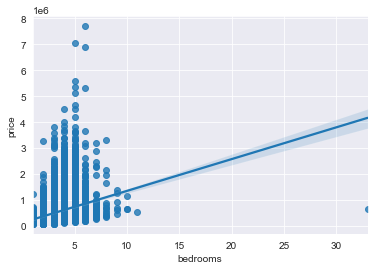

In [5]:
ax = sns.regplot(x='bedrooms', y='price', data=df)

In [6]:
df.loc[df.price > 2000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,NO,GOOD,...,12 Luxury,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,YES,EXCELLENT,...,9 Better,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
269,7960900060,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,NO,AVERAGE,...,11 Excellent,4750,300.0,1982,NaN,98004,47.6312,-122.223,3890,20060
282,7424700045,5/13/2015,2050000.0,5,3.00,3830,8480,2.0,NO,FAIR,...,9 Better,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21294,2154970020,7/3/2014,2350000.0,4,4.25,5010,19412,2.0,NO,FAIR,...,11 Excellent,4000,1010.0,2014,0.0,98040,47.5455,-122.211,3820,17064
21352,9533100285,6/30/2014,2070000.0,4,3.75,4350,7965,2.0,NO,NONE,...,10 Very Good,4350,0.0,2013,0.0,98004,47.6289,-122.205,2190,8557
21490,2524069097,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,NO,NONE,...,12 Luxury,6420,850.0,2010,NaN,98027,47.5371,-121.982,1800,44890
21514,8964800330,4/7/2015,3000000.0,4,3.75,5090,14823,1.0,NO,NONE,...,11 Excellent,4180,910.0,2013,NaN,98004,47.6200,-122.207,3030,12752


In [7]:
df = df[df.price < 2000000]

In [8]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [9]:
df.bedrooms.value_counts()

3     9790
4     6788
2     2758
5     1542
6      260
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df = df[df.bedrooms < 7]

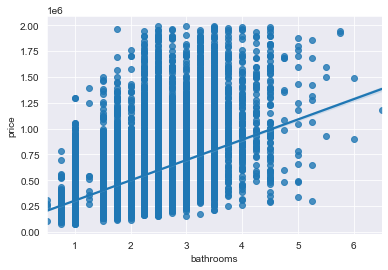

In [11]:
ax = sns.regplot(x='bathrooms', y='price', data=df)

In [12]:
df.bathrooms.value_counts().sort_values()

6.50       1
6.00       2
5.75       2
5.50       3
0.50       4
5.25       8
1.25       9
4.75       9
5.00      15
4.25      58
0.75      71
4.50      84
4.00     109
3.75     138
3.25     553
3.50     706
3.00     728
2.75    1174
1.50    1443
2.00    1928
2.25    2038
1.75    3045
1.00    3850
2.50    5356
Name: bathrooms, dtype: int64

In [13]:
df = df[df.bathrooms >= 0.75]

In [14]:
df=df[df.bathrooms < 5]

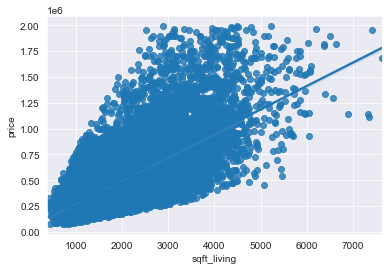

In [15]:
ax = sns.regplot(x='sqft_living', y='price', data=df)

In [16]:
df.loc[df.sqft_living > 6000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
419,8678500060,7/10/2014,1550000.0,5,4.25,6070,171626,2.0,NO,NONE,...,12 Luxury,6070,0.0,1999,0.0,98024,47.5954,-121.950,4680,211267
577,1526069135,12/11/2014,930000.0,4,4.00,6050,84942,2.5,NO,AVERAGE,...,9 Better,4150,1900.0,2009,0.0,98077,47.7466,-122.029,2700,199504
1099,7237500390,11/10/2014,1570000.0,5,4.50,6070,14731,2.0,NO,NONE,...,11 Excellent,6070,0.0,2004,NaN,98059,47.5306,-122.134,4750,13404
1537,3425059222,11/24/2014,1300000.0,6,3.50,6563,32670,2.0,NO,NONE,...,10 Very Good,5153,1410.0,2002,NaN,98005,47.6078,-122.157,2610,22651
2123,4379600030,7/29/2014,1330000.0,3,3.75,6400,76665,1.0,NO,AVERAGE,...,10 Very Good,3810,?,1966,NaN,98177,47.7313,-122.370,3430,60548
2711,7851980260,7/30/2014,1110000.0,5,3.50,7350,12231,2.0,NO,EXCELLENT,...,11 Excellent,4750,2600.0,2001,0.0,98065,47.5373,-121.865,5380,12587
10074,7767000060,9/12/2014,1900000.0,5,4.25,6510,16471,2.0,NO,GOOD,...,11 Excellent,3250,3260.0,1980,0.0,98040,47.5758,-122.242,4480,16471
10939,853600310,8/28/2014,1610000.0,5,4.50,6085,142725,3.0,NO,NONE,...,11 Excellent,6085,0.0,2000,0.0,98014,47.6085,-121.952,4830,128457
11093,4054530260,6/27/2014,1820000.0,4,4.50,6640,53330,2.0,NO,NONE,...,12 Luxury,6640,0.0,1993,0.0,98077,47.7283,-122.046,4620,68625
11673,1126069045,6/20/2014,1140000.0,6,4.25,6900,244716,2.0,NO,NONE,...,9 Better,4820,2080.0,2002,NaN,98077,47.7506,-122.012,4170,266587


In [17]:
df = df[df.sqft_living < 6000]

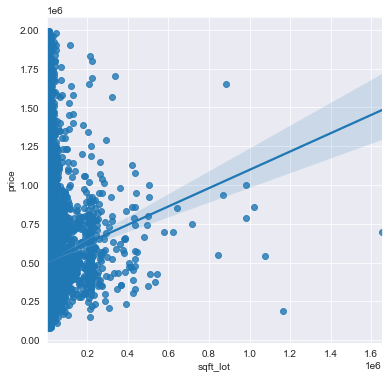

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='sqft_lot', y='price', data=df)

In [19]:
df.loc[df.sqft_lot > 300000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,12/3/2014,921500.0,4,2.50,3670,315374,2.0,NO,NONE,...,9 Better,3670,0.0,1994,0.0,98077,47.7421,-122.026,2840,87991
1701,3121069036,12/8/2014,617000.0,3,1.75,3020,360241,2.0,NO,NaN,...,8 Good,3020,0.0,1992,0.0,98092,47.2662,-122.088,1890,209959
1717,1020069017,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,NO,GOOD,...,6 Low Average,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
1772,1549500370,5/5/2014,210000.0,3,1.00,1340,306848,1.0,NaN,NONE,...,5 Fair,1340,0.0,1953,0.0,98019,47.7534,-121.912,1800,128066
2755,3520069033,6/23/2014,230000.0,3,1.00,1530,389126,1.5,NO,NONE,...,7 Average,1530,0.0,1919,0.0,98022,47.1776,-122.011,1768,42148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,1020069042,10/1/2014,858000.0,4,3.50,4370,422967,1.0,NO,AVERAGE,...,10 Very Good,2580,1790.0,1978,0.0,98022,47.2332,-122.029,3260,422967
19878,1422069070,5/7/2015,472000.0,3,2.50,1860,415126,2.0,NO,NONE,...,7 Average,1860,0.0,2006,0.0,98038,47.3974,-122.005,2070,54014
20405,1623089165,5/6/2015,920000.0,4,3.75,4030,503989,2.0,NO,NONE,...,10 Very Good,4030,0.0,2008,NaN,98045,47.4807,-121.795,2110,71874
20795,1825079046,12/18/2014,580000.0,3,2.50,1820,374616,2.0,NO,NONE,...,7 Average,1820,0.0,1999,0.0,98014,47.6539,-121.959,1870,220654


In [20]:
df = df[df.sqft_lot < 300000]

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21215 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21215 non-null  int64  
 1   date           21215 non-null  object 
 2   price          21215 non-null  float64
 3   bedrooms       21215 non-null  int64  
 4   bathrooms      21215 non-null  float64
 5   sqft_living    21215 non-null  int64  
 6   sqft_lot       21215 non-null  int64  
 7   floors         21215 non-null  float64
 8   waterfront     18877 non-null  object 
 9   view           21154 non-null  object 
 10  condition      21215 non-null  object 
 11  grade          21215 non-null  object 
 12  sqft_above     21215 non-null  int64  
 13  sqft_basement  21215 non-null  object 
 14  yr_built       21215 non-null  int64  
 15  yr_renovated   17445 non-null  float64
 16  zipcode        21215 non-null  int64  
 17  lat            21215 non-null  float64
 18  long  

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.121500e+04,2.121500e+04,21215.00000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000,17445.000000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000
mean,4.596985e+09,5.160071e+05,3.34881,2.088452,2037.835871,13280.948291,1.488617,1755.853076,1970.941881,80.886787,98078.249918,47.559822,-122.214534,1967.858449,12054.803158
std,2.877679e+09,2.823144e+05,0.86848,0.728637,837.320863,26174.581858,0.539104,773.556741,29.305369,393.592013,53.524946,0.138814,0.140448,663.361364,23396.867480
min,1.000102e+06,7.800000e+04,1.00000,0.750000,370.000000,520.000000,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,2.126059e+09,3.200000e+05,3.00000,1.500000,1420.000000,5013.000000,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.469650,-122.329000,1480.000000,5092.000000
50%,3.905100e+09,4.490000e+05,3.00000,2.250000,1900.000000,7560.000000,1.500000,1550.000000,1975.000000,0.000000,98065.000000,47.570900,-122.231000,1830.000000,7586.000000
75%,7.334600e+09,6.320000e+05,4.00000,2.500000,2510.000000,10485.500000,2.000000,2170.000000,1996.000000,0.000000,98118.000000,47.678550,-122.125500,2340.000000,10000.000000
max,9.900000e+09,1.990000e+06,6.00000,4.750000,5990.000000,295772.000000,3.500000,5990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000


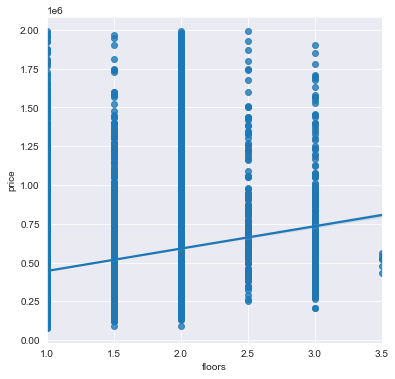

In [24]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='floors', y='price', data=df)

In [25]:
df.floors.value_counts()

1.0    10593
2.0     7997
1.5     1876
3.0      603
2.5      140
3.5        6
Name: floors, dtype: int64

In [26]:
df=df[df.floors <= 3]

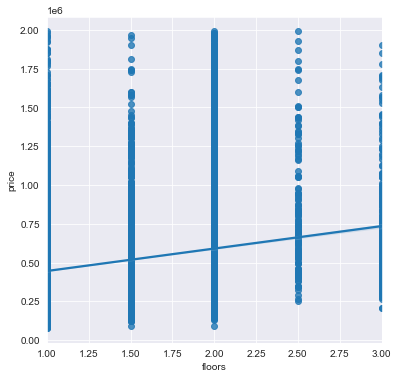

In [27]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='floors', y='price', data=df)

In [28]:
df.view.value_counts()

NONE         19225
AVERAGE        906
GOOD           460
FAIR           312
EXCELLENT      245
Name: view, dtype: int64

In [29]:
df.condition.value_counts()

Average      13765
Good          5590
Very Good     1658
Fair           167
Poor            29
Name: condition, dtype: int64

In [30]:
df = df[df.condition != 'Poor']

In [31]:
df.grade.value_counts()

7 Average        8919
8 Good           6020
9 Better         2571
6 Low Average    2020
10 Very Good     1053
11 Excellent      296
5 Fair            229
12 Luxury          44
4 Low              26
3 Poor              1
13 Mansion          1
Name: grade, dtype: int64

In [32]:
df = df[df.grade!='12 Luxury']
df = df[df.grade!='4 Low']
df = df[df.grade!='13 Mansion']
df = df[df.grade!='3 Poor']

In [33]:
df.grade.value_counts()

7 Average        8919
8 Good           6020
9 Better         2571
6 Low Average    2020
10 Very Good     1053
11 Excellent      296
5 Fair            229
Name: grade, dtype: int64

In [34]:
df.zipcode.value_counts().sort_values()

98039     29
98148     55
98024     73
98102     97
98010     97
        ... 
98117    549
98052    571
98038    581
98115    582
98103    595
Name: zipcode, Length: 70, dtype: int64

Outliers based on low data entries of cities/zipcodes: \
98010, 'Black Diamond'\
98014, 'Carnation'\
98024, 'Fall City'\
98039, 'Medina'\
98013, 'Vashon'\
98070, 'Vashon'

In [35]:
df = df[df.zipcode != 98010]
df = df[df.zipcode != 98014]
df = df[df.zipcode != 98024]
df = df[df.zipcode != 98039]
df = df[df.zipcode != 98013]
df = df[df.zipcode != 98070]

In [36]:
df.zipcode.nunique()

65

#### Target and predictors

In [37]:
# The prediction target for this analysis is the price of the home sold, \
# so we separate the data into X and y accordingly:
y_train = df['price']
X_train = df.drop('price', axis=1)

## 2. Data Preparation

### 2.1 Detecting and dealing with missing values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20685 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20685 non-null  int64  
 1   date           20685 non-null  object 
 2   price          20685 non-null  float64
 3   bedrooms       20685 non-null  int64  
 4   bathrooms      20685 non-null  float64
 5   sqft_living    20685 non-null  int64  
 6   sqft_lot       20685 non-null  int64  
 7   floors         20685 non-null  float64
 8   waterfront     18401 non-null  object 
 9   view           20625 non-null  object 
 10  condition      20685 non-null  object 
 11  grade          20685 non-null  object 
 12  sqft_above     20685 non-null  int64  
 13  sqft_basement  20685 non-null  object 
 14  yr_built       20685 non-null  int64  
 15  yr_renovated   17018 non-null  float64
 16  zipcode        20685 non-null  int64  
 17  lat            20685 non-null  float64
 18  long  

In [39]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2284
view               60
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3667
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

***
#### Data Cleaning tasks for dataset: 
    * check on duplicates. 
    * 'date' is an object. It needs to be converted to date. We also will break it into 'yr_sold' and 'm_sold' variables. 
    * 'waterfront' has 2,376 NaN values. It is most likely for the houses that don't have a waterfront view. 
    * 'view' has 63 NaN values. Most likely these houses don't have a view. We will convert it to None. 
    * 'yr_renovated' has 3,842 missing values. Probably these houses haven't been renovated. We will replace NaN with 0. However, since we are not 100% sure, we will use MissingIndicator to create a new column to represent values that were missing. 
    * 'sqft_basement' is obj. Convert to float64.
    * 'zipcode' is int. It needs to be converted to Categorical variable. 
    * create a new column 'city' to associate zipcodes with corresponding city. 
***

##### Duplicates

In [40]:
# check on duplicates
duplicates = X_train[X_train.duplicated()]
len(duplicates)

0

In [41]:
duplicates_id = X_train[X_train.id.duplicated(keep=False)]
len(duplicates_id)

339

In [42]:
duplicates_id.sort_values('id')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,6,3.00,2400,9373,2.0,NaN,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16801,7200179,4/24/2015,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
16800,7200179,10/16/2014,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,3,1.75,1480,3900,1.0,NO,NONE,Good,7 Average,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,1/6/2015,2,1.00,700,4800,1.0,NO,NONE,Average,7 Average,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2/10/2015,3,1.00,1790,3876,1.5,NO,NONE,Very Good,7 Average,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,7/16/2014,3,1.00,1790,3876,1.5,NO,NONE,Very Good,7 Average,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,4,2.50,2080,4080,1.0,NO,NONE,Very Good,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


In [43]:
#Looks like we have houses with identical ids that have been sold multiple times. 
# We will investigate it further for Market Housing trends. 

##### 'date' 

In [44]:
# convert 'date' values from object to date. 
X_train['date'] = X_train['date'].astype('datetime64[ns]')

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20685 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20685 non-null  int64         
 1   date           20685 non-null  datetime64[ns]
 2   bedrooms       20685 non-null  int64         
 3   bathrooms      20685 non-null  float64       
 4   sqft_living    20685 non-null  int64         
 5   sqft_lot       20685 non-null  int64         
 6   floors         20685 non-null  float64       
 7   waterfront     18401 non-null  object        
 8   view           20625 non-null  object        
 9   condition      20685 non-null  object        
 10  grade          20685 non-null  object        
 11  sqft_above     20685 non-null  int64         
 12  sqft_basement  20685 non-null  object        
 13  yr_built       20685 non-null  int64         
 14  yr_renovated   17018 non-null  float64       
 15  zipcode        2068

In [46]:
X_train.date.describe()

count                   20685
unique                    372
top       2014-06-23 00:00:00
freq                      135
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [47]:
X_train['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 20685, dtype: datetime64[ns]

In [48]:
# create additional two columns with 'yr_sold' and 'mo_sold'
import datetime as dt
X_train['yr_sold'] = X_train['date'].dt.strftime('%Y')
X_train['mo_sold'] = X_train['date'].dt.strftime('%m')
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,02


In [49]:
X_train['yr_sold'] = X_train['yr_sold'].astype('int')
X_train['mo_sold'] = X_train['mo_sold'].astype('int')

##### 'waterfront'

In [50]:
# replace 'waterfront' nan with "NO"
X_train.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [51]:
X_train.waterfront.fillna(value='NO', inplace=True)

In [52]:
X_train.waterfront.unique()

array(['NO', 'YES'], dtype=object)

##### 'view'

In [53]:
# replace 'view' nan with 'NONE'
X_train.view.value_counts()

NONE         18796
AVERAGE        873
GOOD           431
FAIR           299
EXCELLENT      226
Name: view, dtype: int64

In [54]:
X_train.view.fillna(value='NONE', inplace=True)

In [55]:
X_train.view.value_counts()

NONE         18856
AVERAGE        873
GOOD           431
FAIR           299
EXCELLENT      226
Name: view, dtype: int64

##### 'yr_renovated'

In [56]:
# fill nans of 'yr_renovated' with 0.0
X_train.yr_renovated.value_counts()

0.0       16342
2014.0       73
2013.0       29
2003.0       28
2007.0       28
          ...  
1951.0        1
1971.0        1
1948.0        1
1976.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [57]:
X_train.yr_renovated.isna().sum()

3667

In [58]:
# Assuming that NaN is indicating that a house hasn't been renovated. 
# We will first convert '0.0' values to NaN and use MissingIndicator to create a new colunm with whether \
# or not a house been renovated (binary column)
# Then we will convert all NaNs to 0.0 on 'yr_renovated' no make all values numeric. 


In [59]:
X_train = X_train.replace(0.0,np.NaN)
X_train.yr_renovated

0           NaN
1        1991.0
2           NaN
3           NaN
4           NaN
          ...  
21592       NaN
21593       NaN
21594       NaN
21595       NaN
21596       NaN
Name: yr_renovated, Length: 20685, dtype: float64

In [60]:
# (1) Identify data to be transformed
# We only want missing indicators for yr_renovated
yr_renovated = X_train[['yr_renovated']]

# (2) Instantiate the transformer object
missing_indicator = MissingIndicator()

# (3) Fit the transformer object on yr_renovated
missing_indicator.fit(yr_renovated)

# (4) Transform yr_renovated and assign the result
# to yr_renovated_missing_train
yr_renovated_missing_train = missing_indicator.transform(yr_renovated)

# Visually inspect yr_renovated_missing_train
yr_renovated_missing_train

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [61]:
# yr_renovated_missing_train should be a NumPy array
assert type(yr_renovated_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert yr_renovated_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert yr_renovated_missing_train.shape[1] == 1

In [62]:
X_train["Yr_renovated_None"] = yr_renovated_missing_train
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NO,NONE,Average,...,1955,NaN,98178,47.5112,-122.257,1340,5650,2014,10,True
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,False
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2,True
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,NaN,98136,47.5208,-122.393,1360,5000,2014,12,True
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,NaN,98074,47.6168,-122.045,1800,7503,2015,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,NaN,98103,47.6993,-122.346,1530,1509,2014,5,True
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,NaN,98146,47.5107,-122.362,1830,7200,2015,2,True
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,NaN,98144,47.5944,-122.299,1020,2007,2014,6,True
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,NO,NONE,Average,...,2004,NaN,98027,47.5345,-122.069,1410,1287,2015,1,True


In [63]:
X_train.Yr_renovated_None.value_counts()

True     20009
False      676
Name: Yr_renovated_None, dtype: int64

In [64]:
X_train['Yr_renovated_None'] = X_train['Yr_renovated_None'].astype('int64')

In [65]:
X_train.yr_renovated.fillna(value=0.0, inplace=True)

In [66]:
X_train.yr_renovated.value_counts()

0.0       20009
2014.0       73
2013.0       29
2003.0       28
2007.0       28
          ...  
1951.0        1
1971.0        1
1948.0        1
1976.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

##### 'grade'

In [67]:
# check on 'grade' values
X_train.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '10 Very Good', '5 Fair'], dtype=object)

##### 'sqft_basement'

In [68]:
X_train.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '1510.0', '410.0', '990.0', '600.0', '560.0',
       '550.0', '1000.0', '1600.0', '500.0', '1040.0', '880.0', '1010.0',
       '240.0', '265.0', '290.0', '800.0', '540.0', '710.0', '840.0',
       '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0', '1250.0',
       '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0', '1460.0',
       '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0',
       '630.0', '2000.0', '390.0', '430.0', '850.0', '210.0', '1430.0',
       '1950.0', '440.0', '220.0', '1160.0', '860.0', '2060.0', '1180.0',
       '200.0', '1150.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0',
       '960.0', '870.0', '280.0', '1200.0', '1100.0', '460.0', '1400.0',
       '720.0', '660.0', '1220.0', '900.0', '420.0', '1580.0', '1380.0',
       '580.0', '690.0', '270.0', '350.0', '935.0', '1

In [69]:
X_train[X_train['sqft_basement']=='?']

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,NO,NONE,Average,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,6,1
18,16000397,2014-12-05,2,1.00,1200,9850,1.0,NO,NONE,Good,...,1921,0.0,98002,47.3089,-122.210,1060,5095,2014,12,1
42,7203220400,2014-07-07,5,2.75,3595,5639,2.0,NO,NONE,Average,...,2014,0.0,98053,47.6848,-122.016,3625,5639,2014,7,1
112,2525310310,2014-09-16,3,1.75,1540,12600,1.0,NO,NONE,Good,...,1980,0.0,98038,47.3624,-122.031,1540,11656,2014,9,1
115,3626039325,2014-11-21,3,3.50,4380,6350,2.0,NO,NONE,Average,...,1900,0.0,98117,47.6981,-122.368,1830,6350,2014,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,5,3.00,2360,5000,1.0,NO,NONE,Average,...,2008,0.0,98103,47.6931,-122.330,2180,5009,2014,7,1
21447,1760650900,2014-07-21,4,2.50,2330,4907,2.0,NO,NONE,Average,...,2013,0.0,98042,47.3590,-122.081,2300,3836,2014,7,1
21473,6021503707,2015-01-20,2,2.50,980,1010,3.0,NO,NONE,Average,...,2008,0.0,98117,47.6844,-122.387,980,1023,2015,1,1
21519,2909310100,2014-10-15,4,2.50,2380,5737,2.0,NO,NONE,Average,...,2010,0.0,98023,47.2815,-122.356,2380,5396,2014,10,1


In [70]:
# replace '?' value with '0.0'
X_train.sqft_basement.replace(to_replace='?',
    value='0.01',
    inplace=True,)

In [71]:
# 'sqft_basement' obj convert to float
X_train.sqft_basement = X_train.sqft_basement.astype('float')
X_train.sqft_basement.dtype

dtype('float64')

In [72]:
# replace 0.0 value with mean
sqft_basement_mean = X_train.sqft_basement.mean()
X_train.sqft_basement.replace(to_replace= 0.01,
    value=sqft_basement_mean,
    inplace=True,)

X_train.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

In [73]:
df.sqft_basement.value_counts()

0.0       12269
?           438
600.0       210
500.0       203
700.0       202
          ...  
861.0         1
1008.0        1
1525.0        1
1820.0        1
516.0         1
Name: sqft_basement, Length: 274, dtype: int64

In [74]:
X_train.sqft_basement.value_counts()

0.000000       12269
278.723151       438
600.000000       210
500.000000       203
700.000000       202
               ...  
935.000000         1
2610.000000        1
1135.000000        1
1990.000000        1
518.000000         1
Name: sqft_basement, Length: 274, dtype: int64

##### 'condition'

In [75]:
X_train.condition.unique()

array(['Average', 'Very Good', 'Good', 'Fair'], dtype=object)

##### 'zipcode'

In [76]:
# convert 'zipcode' from int to obj
X_train.zipcode = df.zipcode.astype('string')
X_train.zipcode.dtype

StringDtype

In [77]:
X_train.zipcode.nunique()

65

In [78]:
city_zipcode_table = pd.read_html('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')

In [79]:
city_zipcode_1 = city_zipcode_table[2]
city_zipcode_2 = city_zipcode_table[3]
city_zipcode_3 = city_zipcode_table[4]
city_zipcode = pd.concat([city_zipcode_1, city_zipcode_2, city_zipcode_3])
city_zipcode

,Zip Code,City,County
0,98001,Algona,King County
1,98001,Auburn,King County
2,98001,Federal Way,King County
3,98002,Auburn,King County
4,98003,Auburn,King County
...,...,...,...
44,98198,Seatac,King County
45,98198,Seattle,King County
46,98199,Seattle,King County
47,98224,Baring,King County


In [80]:
city_dict = dict(zip(city_zipcode['Zip Code'], city_zipcode['City']))
len(city_dict)
city_dict

{98001: 'Federal Way',
 98002: 'Auburn',
 98003: 'Federal Way',
 98004: 'Yarrow Point',
 98005: 'Bellevue',
 98006: 'Bellevue',
 98007: 'Bellevue',
 98008: 'Bellevue',
 98009: 'Bellevue',
 98010: 'Black Diamond',
 98011: 'Bothell',
 98013: 'Vashon',
 98014: 'Carnation',
 98015: 'Bellevue',
 98019: 'Duvall',
 98022: 'Enumclaw',
 98023: 'Federal Way',
 98024: 'Fall City',
 98025: 'Hobart',
 98027: 'Issaquah',
 98028: 'Bothell',
 98029: 'Issaquah',
 98030: 'Kent',
 98031: 'Kent',
 98032: 'Kent',
 98033: 'Kirkland',
 98034: 'Kirkland',
 98035: 'Kent',
 98038: 'Maple Valley',
 98039: 'Medina',
 98040: 'Mercer Island',
 98041: 'Bothell',
 98042: 'Kent',
 98045: 'North Bend',
 98047: 'Pacific',
 98050: 'Preston',
 98051: 'Ravensdale',
 98052: 'Redmond',
 98053: 'Redmond',
 98054: 'Redondo',
 98055: 'Renton',
 98056: 'Renton',
 98057: 'Renton',
 98058: 'Renton',
 98059: 'Renton',
 98062: 'Seahurst',
 98063: 'Federal Way',
 98064: 'Kent',
 98065: 'Snoqualmie',
 98068: 'Snoqualmie',
 98070: 'Vas

In [81]:
# manually imputing one zipcode missing from the list. 
city_dict[98077] = 'Woodinville'

In [82]:
X_train.zipcode = X_train.zipcode.astype('int')

In [83]:
X_train['city'] = X_train.zipcode.apply(lambda x: city_dict[x])
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None,city
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,1,Tukwila
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,0,Seattle
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,98028,47.7379,-122.233,2720,8062,2015,2,1,Bothell
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,1,Seattle
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,1,Redmond


In [84]:
X_train.city.nunique()

20

In [85]:
X_train.city.value_counts()

Seattle          6789
Renton           1575
Redmond          1403
Kent             1194
Shoreline        1177
Federal Way      1138
Issaquah         1064
Bellevue         1036
Kirkland          952
Tukwila           851
Maple Valley      581
Auburn            543
Bothell           476
Woodinville       463
Snoqualmie        302
Yarrow Point      276
Mercer Island     253
Enumclaw          214
North Bend        212
Duvall            186
Name: city, dtype: int64

Seeing that cities like Carnation, Vashon, Black Diamond, Fall City, and Medina have low frequency of 
data entries (94, 80, 74, 51, 27 respectively), we will map them to their corresponding zip codes and 
 treat them as outliers. We will process the outliers in 'Outliers' section of this notebook prior to 
 train-test split. 

In [86]:
sorted(city_dict.items(), key = lambda kv: kv[1])

[(98002, 'Auburn'),
 (98071, 'Auburn'),
 (98092, 'Auburn'),
 (98224, 'Baring'),
 (98005, 'Bellevue'),
 (98006, 'Bellevue'),
 (98007, 'Bellevue'),
 (98008, 'Bellevue'),
 (98009, 'Bellevue'),
 (98015, 'Bellevue'),
 (98010, 'Black Diamond'),
 (98011, 'Bothell'),
 (98028, 'Bothell'),
 (98041, 'Bothell'),
 (98014, 'Carnation'),
 (98019, 'Duvall'),
 (98022, 'Enumclaw'),
 (98024, 'Fall City'),
 (98001, 'Federal Way'),
 (98003, 'Federal Way'),
 (98023, 'Federal Way'),
 (98063, 'Federal Way'),
 (98093, 'Federal Way'),
 (98025, 'Hobart'),
 (98027, 'Issaquah'),
 (98029, 'Issaquah'),
 (98075, 'Issaquah'),
 (98030, 'Kent'),
 (98031, 'Kent'),
 (98032, 'Kent'),
 (98035, 'Kent'),
 (98042, 'Kent'),
 (98064, 'Kent'),
 (98033, 'Kirkland'),
 (98034, 'Kirkland'),
 (98083, 'Kirkland'),
 (98038, 'Maple Valley'),
 (98039, 'Medina'),
 (98040, 'Mercer Island'),
 (98045, 'North Bend'),
 (98047, 'Pacific'),
 (98050, 'Preston'),
 (98051, 'Ravensdale'),
 (98052, 'Redmond'),
 (98053, 'Redmond'),
 (98073, 'Redmond'),

98010, 'Black Diamond'\
98014, 'Carnation'\
98024, 'Fall City'\
98039, 'Medina'\
98013, 'Vashon'\
98070, 'Vashon'

### 2.2  Checking on Normality of Data

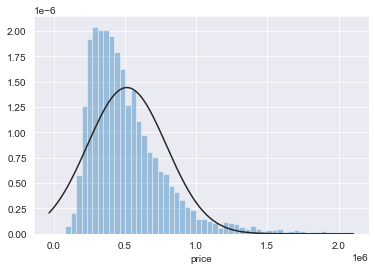

In [87]:
#Checking on normality of target data
from scipy.stats import norm
ax = sns.distplot(y_train, fit=norm, kde=False)

Target ('price') data is skewed left with a heavy right tail. 

In [88]:
# Checking on normality of predictor data 
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'mo_sold',
       'Yr_renovated_None', 'city'],
      dtype='object')

In [89]:
# data subsetting and check on data normality

subset = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 
          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
          'sqft_lot15', 'waterfront', 'view', 'grade', 'condition', 'Yr_renovated_None', 'yr_sold', 
          'mo_sold', 'city']
X_train_subset = X_train.loc[:, subset]

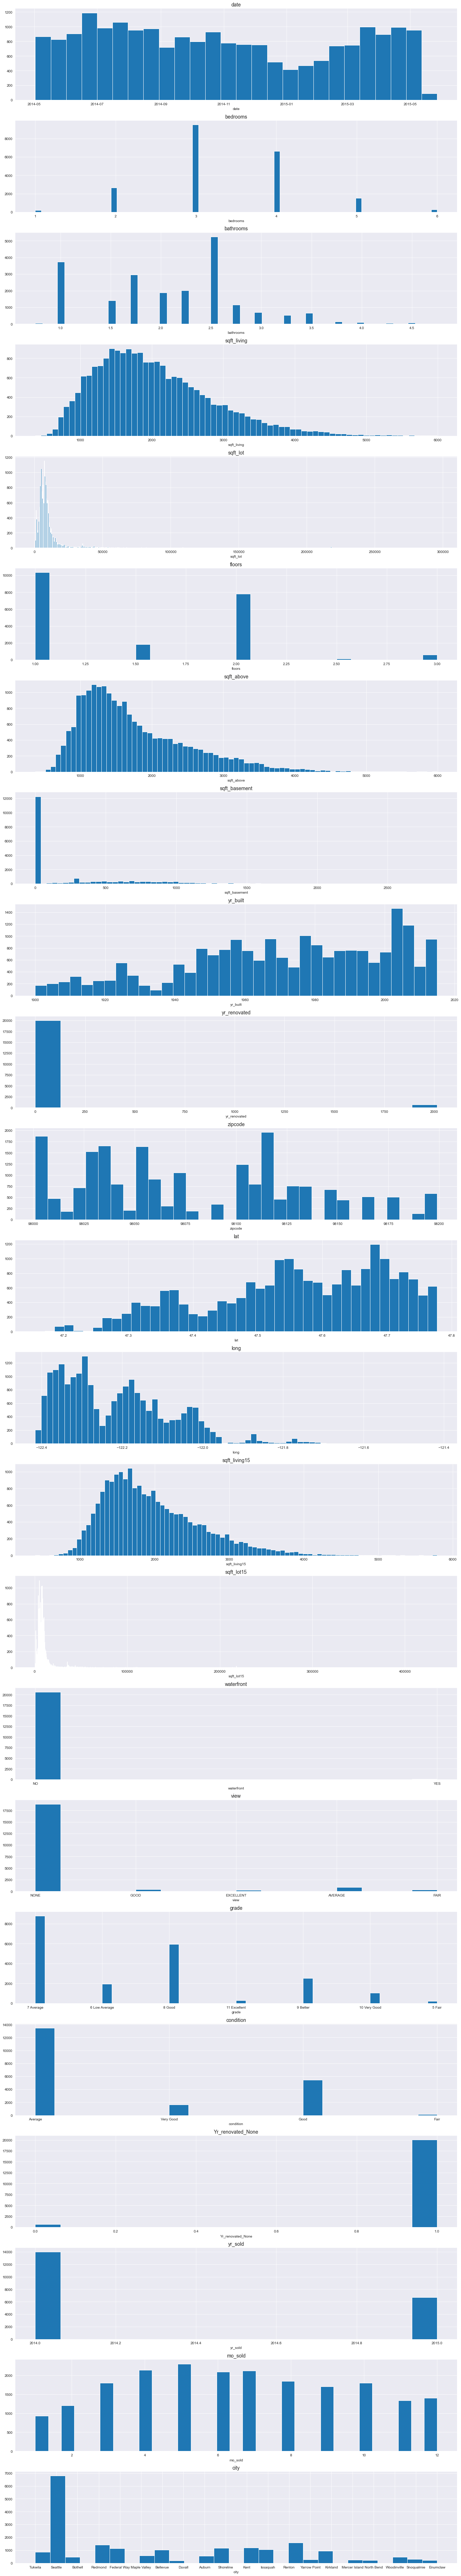

In [90]:
#X_train_subset.hist()
fig, axes = plt.subplots(nrows=23, ncols=1, figsize=(18,100))

for ax, column in zip(axes.flatten(), X_train_subset.columns):
    ax.hist(X_train_subset[column], bins = 'auto', label=column)
    ax.set_title(f'{column}', fontsize = 14)
    ax.set_xlabel(column)

fig.tight_layout()

In [91]:
# You observations here 

### 2.3 Checking in Linearity Assumption 

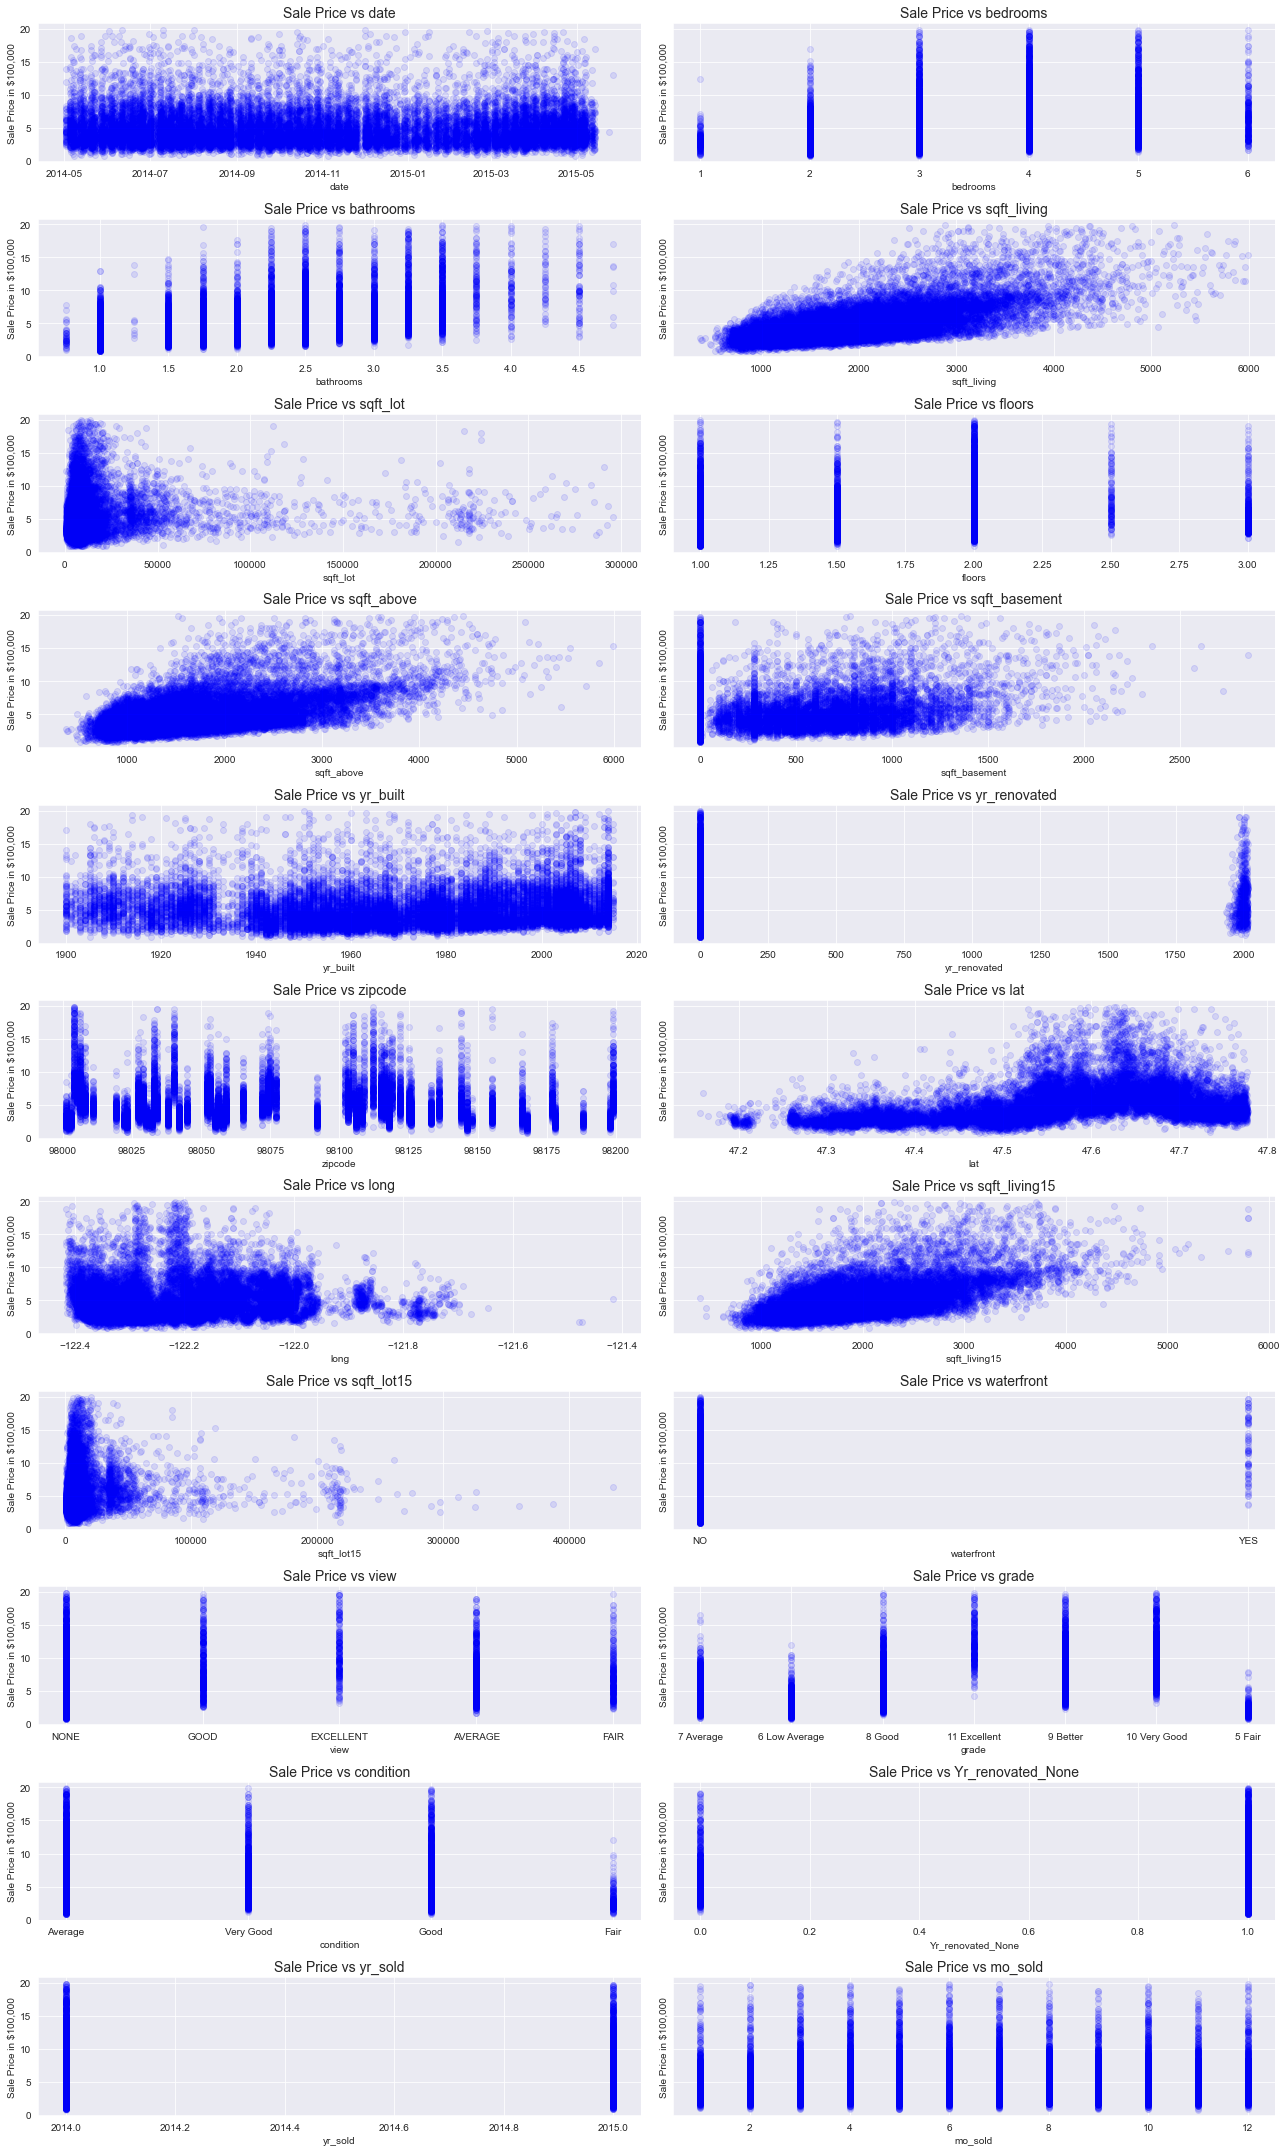

In [92]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(18,30), sharey=True)

for ax, column in zip(axes.flatten(), X_train_subset.columns):
    ax.scatter(X_train_subset[column], y_train / 100_000, label=column, color = 'b', alpha=.1)
    ax.set_title(f'Sale Price vs {column}', fontsize = 14)
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [93]:
# Continuous var: 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', \
# 'sqft_lot15'.
# For now go under Continuous: 'bedrooms', 'bathrooms', 'floors' 
# Categorical var: 'zipcode', 'waterfront', 'view', 'Grade', 'condition', 'Yr_renovated_Missing', 'city'
# Unclear var: 'date', 'yr_built', 'yr_renovated'

In [94]:
#Linearity is appearring to be prominent between 'price' and these features: 'sqft_living', 'sqft_above', \
#'sqft_living15'

### 2.4 Converting Categorical variables to numeric (one-hot encoder)

In [95]:
# Categorical var: 'zipcode', 'waterfront', 'view', 'grade', 'condition', 'city' that needs to be converted to 
# numeric value through One-Hot-Encoder

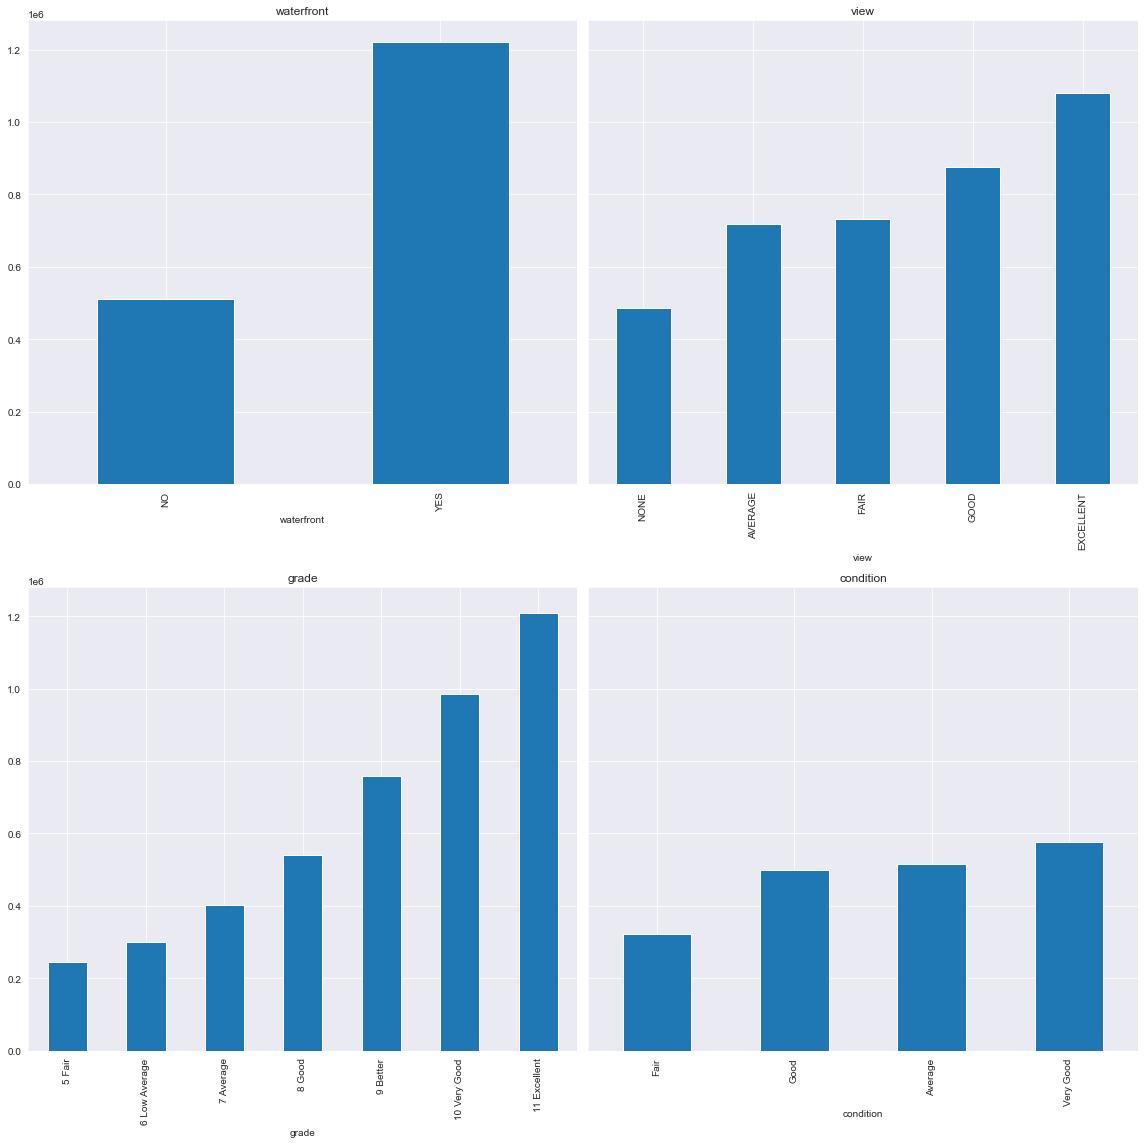

In [96]:
# Plot categorical variables against price with a bar graph. 

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16), sharey=True)

categoricals = ['waterfront', 'view', 'grade', 'condition']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [97]:
# Create dummy variables for four categorical features
categoricals = ['waterfront', 'view', 'grade', 'condition', 'city']
dummies = pd.get_dummies(X_train_subset[categoricals], prefix=categoricals, drop_first=True)


In [98]:
X_train_preprocessed = X_train_subset.drop(categoricals, axis=1)

X_train_preprocessed = pd.concat([X_train_preprocessed, dummies], axis=1)

X_train_preprocessed.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
0,2014-10-13,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,0,1,0,0,0,0,0
2,2015-02-25,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,0,1,0,0,0,0,0
4,2015-02-18,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
X_train_preprocessed.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'yr_sold', 'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point'],
      dtype='object')

In [100]:
X_train_preprocessed_2 = X_train_preprocessed.copy()
X_train_preprocessed_2.yr_sold = X_train_preprocessed_2.yr_sold.astype('object')
X_train_preprocessed_2.mo_sold = X_train_preprocessed_2.mo_sold.astype('object')

In [101]:
# Create dummy variables for two additional categorical features: yr_sold and mo_sold
categoricals_2 = ['yr_sold', 'mo_sold']
dummies2 = pd.get_dummies(X_train_preprocessed_2[categoricals_2], prefix=categoricals_2, drop_first=True)


In [102]:
X_train_preprocessed_2 = X_train_preprocessed_2.drop(categoricals_2, axis=1)

X_train_preprocessed_2 = pd.concat([X_train_preprocessed_2, dummies2], axis=1)

X_train_preprocessed_2.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
0,2014-10-13,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,0,0,1
2,2015-02-25,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_train_preprocessed_2.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'yr_sold_2015', 'mo_sold_2', 'mo_sold_3',
       'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
     

### 2.5 Correlation and Multicollinearity

In [104]:
# Checking on correlation between target and predictors

In [105]:
# get rid of 'date' and 'zipcode' column
X_train_preprocessed = X_train_preprocessed.drop(['date', 'zipcode', 'yr_renovated'], axis=1)
X_train_preprocessed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
0,3,1.00,1180,5650,1.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,0,1,0,0,0,0,0
2,2,1.00,770,10000,1.0,770,0.0,1933,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,1050,910.0,1965,47.5208,-122.393,...,0,0,0,0,1,0,0,0,0,0
4,3,2.00,1680,8080,1.0,1680,0.0,1987,47.6168,-122.045,...,0,0,1,0,0,0,0,0,0,0


In [106]:
X_y_train = pd.concat([X_train_preprocessed, y_train], axis=1)
X_y_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point,price
0,3,1.00,1180,5650,1.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,0,0,0,1,0,0,221900.0
1,3,2.25,2570,7242,2.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,0,0,538000.0
2,2,1.00,770,10000,1.0,770,0.0,1933,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,180000.0
3,4,3.00,1960,5000,1.0,1050,910.0,1965,47.5208,-122.393,...,0,0,0,1,0,0,0,0,0,604000.0
4,3,2.00,1680,8080,1.0,1680,0.0,1987,47.6168,-122.045,...,0,1,0,0,0,0,0,0,0,510000.0


In [107]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20685 entries, 0 to 21596
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             20685 non-null  int64  
 1   bathrooms            20685 non-null  float64
 2   sqft_living          20685 non-null  int64  
 3   sqft_lot             20685 non-null  int64  
 4   floors               20685 non-null  float64
 5   sqft_above           20685 non-null  int64  
 6   sqft_basement        20685 non-null  float64
 7   yr_built             20685 non-null  int64  
 8   lat                  20685 non-null  float64
 9   long                 20685 non-null  float64
 10  sqft_living15        20685 non-null  int64  
 11  sqft_lot15           20685 non-null  int64  
 12  Yr_renovated_None    20685 non-null  int64  
 13  yr_sold              20685 non-null  int64  
 14  mo_sold              20685 non-null  int64  
 15  waterfront_YES       20685 non-null 

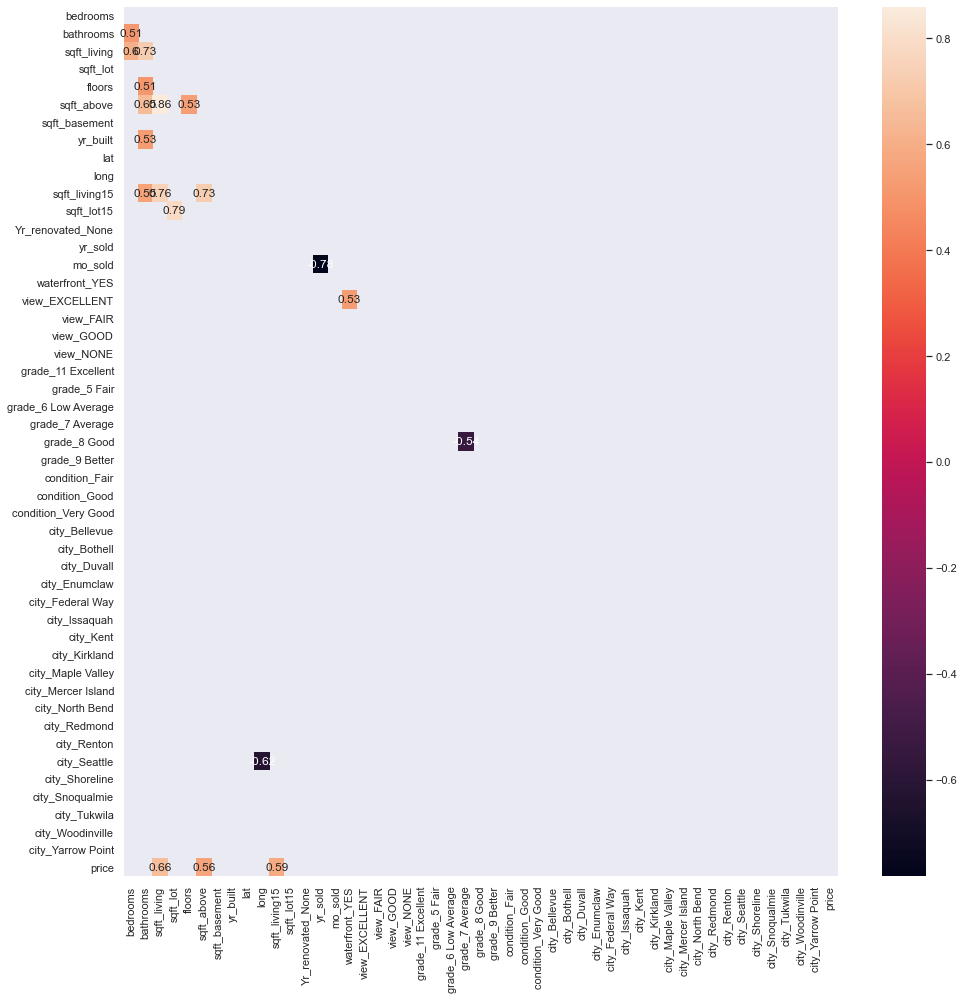

In [108]:
# Use the .heatmap method to illustrate the correlation. 
corr = X_y_train.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
sns.set(rc={'figure.figsize':(16, 16)})
sns.heatmap(corr, mask=trimask | (np.abs(corr) <= 0.5), annot=True);

In [109]:
# Let's look at the correlations with 'price'
# (our dependent variable) in particular.

df_corrs = X_y_train.corr()['price'].map(abs).sort_values(ascending=False)
df_corrs

price                  1.000000
sqft_living            0.664859
sqft_living15          0.586618
sqft_above             0.562328
bathrooms              0.490697
lat                    0.380550
grade_7 Average        0.348389
grade_9 Better         0.328343
view_NONE              0.325422
bedrooms               0.319260
grade_11 Excellent     0.298813
sqft_basement          0.282652
floors                 0.275011
city_Yarrow Point      0.269300
grade_6 Low Average    0.247701
view_EXCELLENT         0.215262
city_Mercer Island     0.214634
city_Federal Way       0.198484
city_Kent              0.192743
view_GOOD              0.191234
city_Tukwila           0.163785
city_Bellevue          0.161754
waterfront_YES         0.156878
city_Redmond           0.137780
city_Renton            0.121455
city_Issaquah          0.114158
Yr_renovated_None      0.110364
city_Seattle           0.106200
grade_5 Fair           0.098472
view_FAIR              0.095088
sqft_lot               0.094735
city_Map

In [110]:
# few visuals to test 

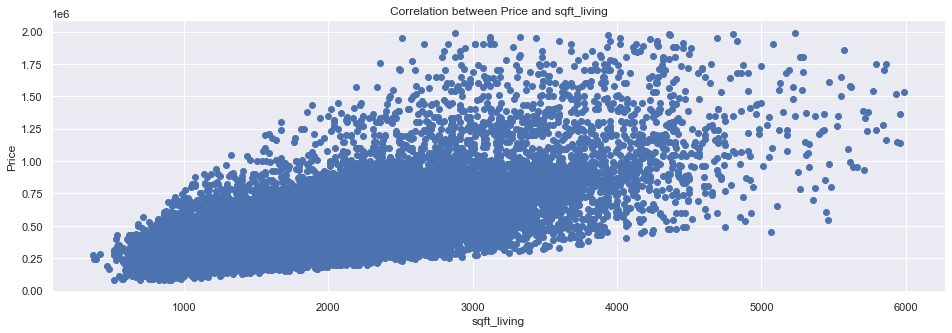

In [111]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Plot data
ax.scatter(x = X_train_preprocessed.sqft_living, y = y_train)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("sqft_living")
ax.set_ylabel("Price")
ax.set_title("Correlation between Price and sqft_living");

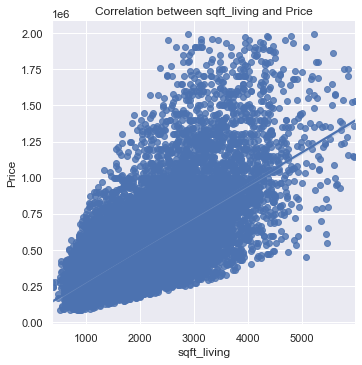

In [112]:
# like that it is showing best fit line. 
ax = sns.lmplot(x='sqft_living', y='price' , data=X_y_train)
ax.set(xlabel='sqft_living', ylabel='Price')
plt.title('Correlation between sqft_living and Price')
plt.savefig('Correlation bw sqft_living and Price.png', bbox_inches='tight');

### 2.6 Multicollinearity

In [113]:
# checking on multicollinearity among predictor variables with VIF and Pearson correlation

In [114]:
# checking multicollinearity with VIF among predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# the independent variables set
X = sm.add_constant(X_train_preprocessed)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

                feature           VIF
0                 const  6.004606e+07
3           sqft_living  1.834913e+02
6            sqft_above  1.559354e+02
7         sqft_basement  4.746770e+01
43         city_Seattle  1.981862e+01
10                 long  1.330340e+01
24      grade_7 Average  1.027729e+01
44       city_Shoreline  7.595120e+00
9                   lat  7.308418e+00
41         city_Redmond  7.083756e+00
25         grade_8 Good  6.807540e+00
37        city_Kirkland  5.255354e+00
23  grade_6 Low Average  5.240626e+00
35        city_Issaquah  4.914715e+00
42          city_Renton  4.454069e+00
30        city_Bellevue  4.357372e+00
34     city_Federal Way  3.622263e+00
47     city_Woodinville  3.567111e+00
31         city_Bothell  3.565139e+00
46         city_Tukwila  3.355583e+00
26       grade_9 Better  3.264856e+00
2             bathrooms  3.204339e+00
11        sqft_living15  3.199767e+00
36            city_Kent  3.159251e+00
45      city_Snoqualmie  2.942950e+00
8           

In [116]:
# correlation matrix
X_train_preprocessed.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
bedrooms,1.000000,0.510518,0.603360,0.066185,0.171030,0.488611,0.292168,0.170140,-0.026768,0.159489,...,0.080226,-0.016305,0.045473,0.048963,-0.192475,-0.032945,0.028180,-0.035058,0.026517,0.050011
bathrooms,0.510518,1.000000,0.729720,0.082651,0.508505,0.654071,0.242249,0.529936,0.012274,0.253532,...,0.073202,-0.003084,0.122985,0.012932,-0.179107,-0.091536,0.078015,-0.110273,0.047180,0.039530
sqft_living,0.603360,0.729720,1.000000,0.203711,0.350334,0.859412,0.398693,0.336242,0.041564,0.274915,...,0.114110,-0.007481,0.151609,0.017802,-0.222030,-0.071305,0.077829,-0.094893,0.091122,0.079966
sqft_lot,0.066185,0.082651,0.203711,1.000000,-0.040133,0.203216,0.031557,0.054652,-0.078586,0.277661,...,0.003709,0.099314,0.070893,0.006309,-0.200448,-0.034358,-0.003475,-0.030302,0.170582,0.000475
floors,0.171030,0.508505,0.350334,-0.040133,1.000000,0.533675,-0.272158,0.498523,0.045770,0.136629,...,-0.006357,0.000681,0.076976,-0.012222,0.025770,-0.085269,0.089076,-0.101024,0.013598,-0.018394
sqft_above,0.488611,0.654071,0.859412,0.203216,0.533675,1.000000,-0.120323,0.445872,-0.015020,0.383733,...,0.083572,0.015485,0.199944,0.051111,-0.301799,-0.087782,0.112494,-0.117003,0.107942,0.065436
sqft_basement,0.292168,0.242249,0.398693,0.031557,-0.272158,-0.120323,1.000000,-0.144101,0.107021,-0.152223,...,0.071384,-0.041126,-0.063564,-0.057393,0.107936,0.020386,-0.050554,0.025677,-0.015085,0.039056
yr_built,0.170140,0.529936,0.336242,0.054652,0.498523,0.445872,-0.144101,1.000000,-0.154310,0.428543,...,-0.002926,0.049811,0.179131,0.086203,-0.409861,-0.075594,0.109894,-0.100647,0.060340,-0.008547
lat,-0.026768,0.012274,0.041564,-0.078586,0.045770,-0.015020,0.107021,-0.154310,1.000000,-0.151052,...,-0.001039,-0.064039,0.198537,-0.171500,0.221390,0.324603,-0.025492,-0.092414,0.204966,0.045359
long,0.159489,0.253532,0.274915,0.277661,0.136629,0.383733,-0.152223,0.428543,-0.151052,1.000000,...,-0.006665,0.344704,0.296340,0.115117,-0.624783,-0.211847,0.319431,-0.102941,0.128104,0.011233


In [117]:
# create variable pairs from the correlation matrix that have correlations over .75

X_train_pairs=X_train_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
X_train_pairs['pairs'] = list(zip(X_train_pairs.level_0, X_train_pairs.level_1))

# set index to pairs
X_train_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
X_train_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
X_train_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
X_train_pairs.drop_duplicates(inplace=True)

In [118]:
# correlation pairs
X_train_pairs[(X_train_pairs.cc>.75) & (X_train_pairs.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.859412
"(sqft_lot15, sqft_lot)",0.788447
"(yr_sold, mo_sold)",0.782404
"(sqft_living, sqft_living15)",0.756769


In [119]:
# Looks like we can drop yr_renovated, sqft_above, condition_Average, yr_sold or mo_sold, 
# bathrooms, and sqft_living15

### 2.6.1 Recursive Feature Elimination in Scikit-Learn

In [120]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [121]:
ss = StandardScaler()
ss.fit(X_train_preprocessed)

X_train_scaled = ss.transform(X_train_preprocessed)

In [122]:
select.fit(X=X_train_scaled, y=y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [123]:
select.support_

array([False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [124]:
select.ranking_

array([33, 11,  1, 36, 38, 22, 24,  4,  1, 34, 19, 37, 32, 27, 40, 12, 17,
       46, 28,  8, 18,  7,  3,  1,  2,  6, 41, 29, 25, 35, 13, 16, 26, 39,
       42, 31, 23, 45, 10, 44, 21, 20, 43,  9, 30, 15, 14,  5])

In [125]:
X_train_preprocessed.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Yr_renovated_None', 'yr_sold',
       'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point'],
      dtype='object')

In [126]:
df_ranking = pd.DataFrame(select.ranking_, X_train_preprocessed.columns) 
df_ranking.columns = ['Ranking']
df_ranking.sort_values('Ranking', ascending = True)

,Ranking
grade_7 Average,1
sqft_living,1
lat,1
grade_8 Good,2
grade_6 Low Average,3
yr_built,4
city_Yarrow Point,5
grade_9 Better,6
grade_5 Fair,7
view_NONE,8


Three main Features according to Recurrsive Feature Elimination are 'sqft_living', 'lat', 'grade_7 Average'


In [127]:
# Multicollinearity among 'sqft_living', 'lat', 'waterfront_YES'. 

Preds = X_train_preprocessed[['sqft_living', 'lat', 'grade_7 Average']]
target = y_train

In [128]:
#lr = LinearRegression()
lr_rfe.fit(Preds, target)

LinearRegression()

In [129]:
lr_rfe.score(Preds, target)

0.5777285591375496

In [130]:
Preds.corr()

,sqft_living,lat,grade_7 Average
sqft_living,1.000000,0.041564,-0.364977
lat,0.041564,1.000000,-0.039055
grade_7 Average,-0.364977,-0.039055,1.000000


### 2.6.2 Stepwise selection with p-values

In [131]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            worst_feature_name = included[worst_feature]
            included.pop(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature_name, worst_pval))
        if not changed:
            break
    return included

In [132]:
result = stepwise_selection(X_train_preprocessed, y_train, verbose=True)
print('resulting features:')
print(result)

Add  floors                         with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  city_Seattle                   with p-value 0.0
Add  city_Yarrow Point              with p-value 0.0
Add  city_Mercer Island             with p-value 0.0
Drop floors                         with p-value 0.0573764
Add  view_NONE                      with p-value 0.0
Add  city_Bellevue                  with p-value 1.17189e-237
Add  sqft_living15                  with p-value 2.17651e-161
Add  waterfront_YES                 with p-value 1.27025e-160
Add  condition_Very Good            with p-value 5.22442e-75
Add  city_Issaquah                  with p-value 1.3634e-76
Add  city_Kirkland                  with p-value 5.02424e-73
Add  city_Redmond                   with p-value 7.04963e-73
Add  grade_11 Excellent            

## 3. Transformaltion and Feature Engineering

##### Lat and long multiple var

In [133]:
# create a new column of multiplication between 'lat' and 'long'
X_train_preprocessed['coordinates'] = X_train_preprocessed['lat']*X_train_preprocessed['long']

##### Log transformation on features

In [134]:
X_train_prep_log = X_train_preprocessed.copy()
X_train_prep_log['sqft_living'] = X_train_prep_log['sqft_living'].map(lambda x: np.log(x))
X_train_prep_log.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point,coordinates
0,3,1.00,7.073270,5650,1.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,0,0,0,1,0,0,-5808.576778
1,3,2.25,7.851661,7242,2.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,0,0,-5837.184999
2,2,1.00,6.646391,10000,1.0,770,0.0,1933,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,-5835.146731
3,4,3.00,7.580700,5000,1.0,1050,910.0,1965,47.5208,-122.393,...,0,0,0,1,0,0,0,0,0,-5816.213274
4,3,2.00,7.426549,8080,1.0,1680,0.0,1987,47.6168,-122.045,...,0,1,0,0,0,0,0,0,0,-5811.392356


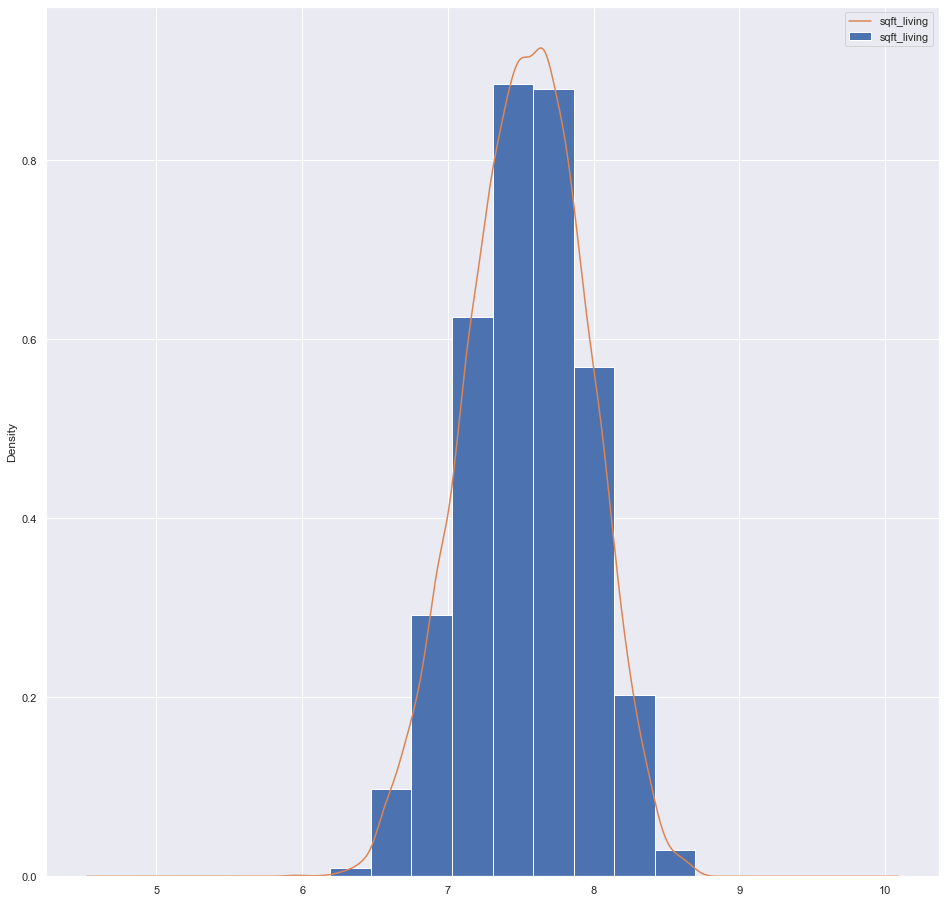

In [135]:
X_train_prep_log['sqft_living'].plot.hist(density=True)
X_train_prep_log.sqft_living.plot.kde()
plt.legend()
plt.show()

In [136]:
# Log transformation of 'sqft_living' on X_train_preprocessed_2

In [137]:
X_train_prep_2_log = X_train_preprocessed_2.copy()
X_train_prep_2_log['sqft_living'] = X_train_prep_2_log['sqft_living'].map(lambda x: np.log(x))
X_train_prep_2_log.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
0,2014-10-13,3,1.00,7.073270,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,3,2.25,7.851661,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,0,0,1
2,2015-02-25,2,1.00,6.646391,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,3.00,7.580700,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,3,2.00,7.426549,8080,1.0,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


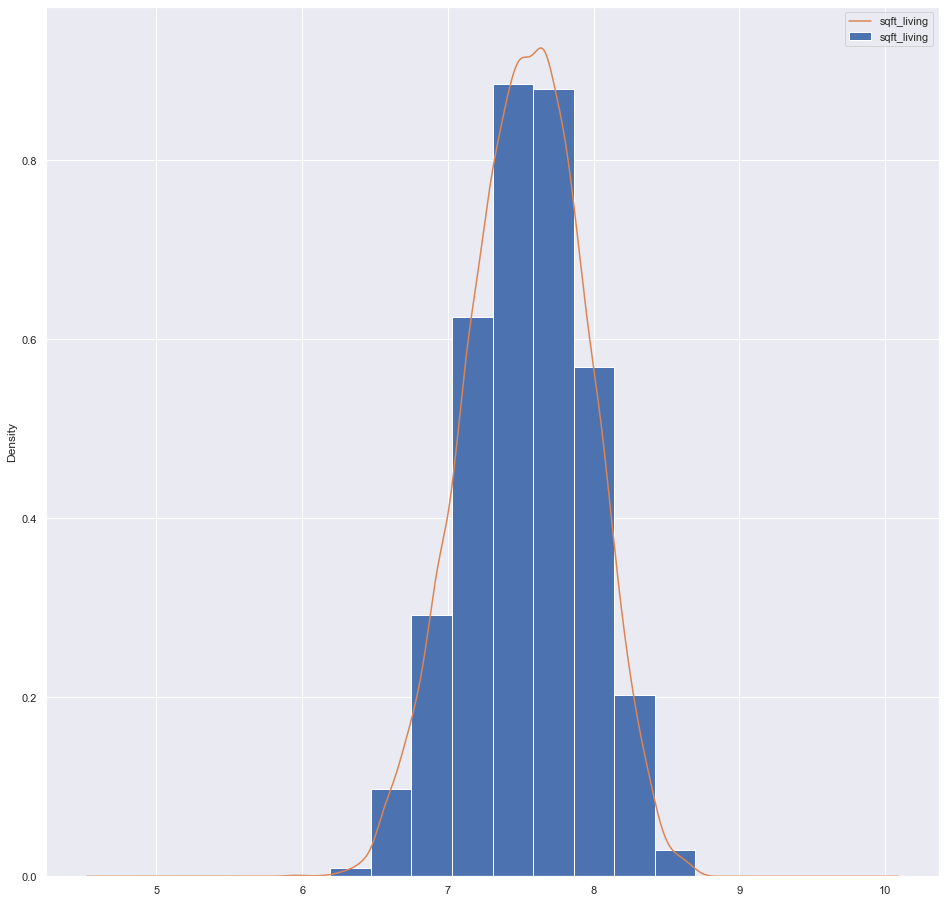

In [138]:
X_train_prep_2_log['sqft_living'].plot.hist(density=True)
X_train_prep_2_log.sqft_living.plot.kde()
plt.legend()
plt.show()

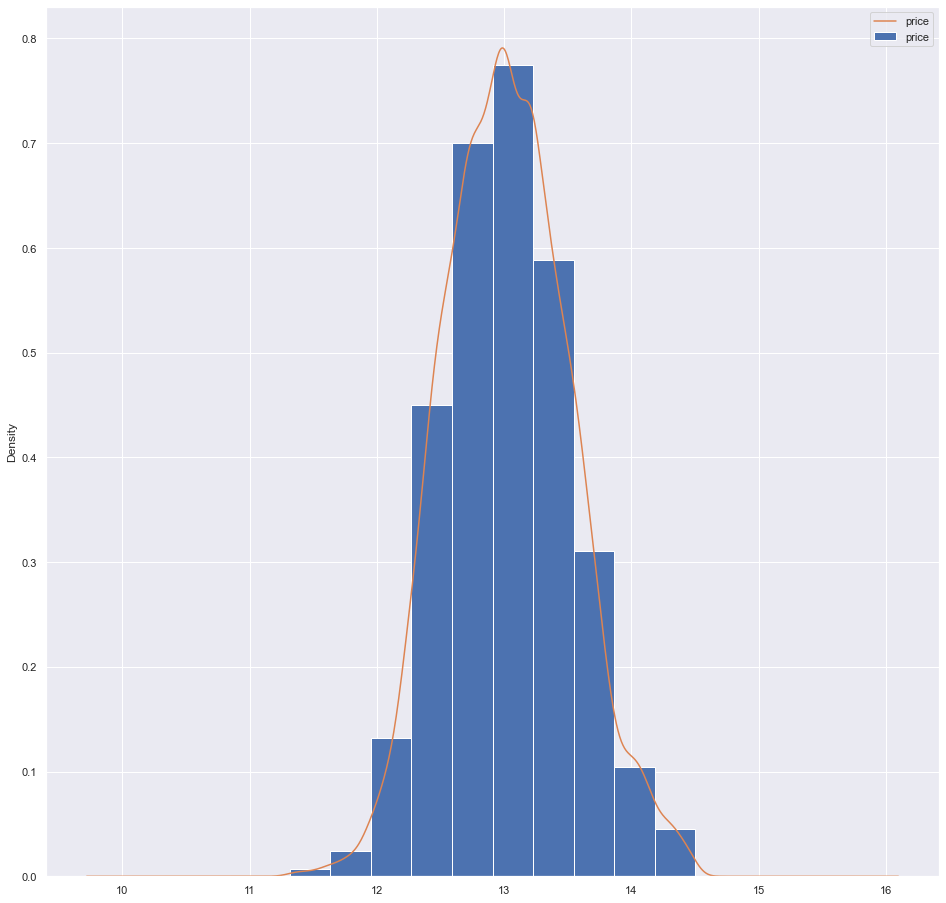

In [139]:
# Log transformaltion of target data
y_train_log = np.log(y_train)

y_train_log.plot.hist(density=True)
y_train_log.plot.kde()
plt.legend()
plt.show()

## 4. Data Modeling

### Base_Model

In [140]:
# Model based on Recursive Feature Elimination, but substituting 'grade_7 Average' with 'waterfront_YES'

In [141]:
features = ['sqft_living', 'lat', 'waterfront_YES']

In [142]:
model_data = X_train_preprocessed.loc[:, features]

In [143]:
predictors = sm.add_constant(model_data)
base_model = sm.OLS(y_train, predictors).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     9687.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:31   Log-Likelihood:            -2.7947e+05
No. Observations:               20685   AIC:                         5.590e+05
Df Residuals:                   20681   BIC:                         5.590e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -3.36e+07   4.26e+05    -78.972      0.000   -3.44e+07   -3.28e+07
sqft_living      215.8129      1.505    143.432      0.000     212.864     218.762
lat             7.081e+05   8949.190     79.123      0.000    6.91e+05    7.26e+05
waterfront_YES  5.968e+05   2.03e+04     29.446      0.000    5.57e+05    6.37e+05
==============================================================================
Omnibus:                     6405.071   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29521.506
Skew:                           1.444   Prob(JB):                         0.00
Kurtosis:                       8.090   Cond. No.                     7.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Checking on Multicollinearity with VIF

In [144]:
# the independent variables set
X = predictors
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,117591.434710
1,sqft_living,1.003704
3,waterfront_YES,1.002071
2,lat,1.001872


### Model_2

In [145]:
# Model_2 based on Stepwise selection with p-values

In [146]:
X_train_preprocessed.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Yr_renovated_None', 'yr_sold',
       'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'coordinates'],
      dtype='object')

In [147]:
features_2 = ['sqft_above', 'lat', 'sqft_basement', 'view_EXCELLENT', 'grade_11 Excellent', 
              'view_NONE', 'waterfront_YES', 'sqft_living15', 'condition_Very Good', 
              'yr_built', 'bathrooms', 'bedrooms', 'grade_9 Better', 'yr_sold', 'view_GOOD',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair', 'condition_Good', 
              'Yr_renovated_None', 'mo_sold', 'sqft_living', 'sqft_lot', 
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point', 'coordinates']

In [148]:
model_data_2 = X_train_preprocessed.loc[:, features_2]

In [149]:
predictors_2 = sm.add_constant(model_data_2)
model_2 = sm.OLS(y_train, predictors_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1962.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:31   Log-Likelihood:            -2.7153e+05
No. Observations:               20685   AIC:                         5.432e+05
Df Residuals:                   20640   BIC:                         5.435e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.028e+08   5.94e+06    -17.310      0.000   -1.14e+08   -9.11e+07
sqft_above             62.5382     13.792      4.535      0.000      35.506      89.571
lat                  6.781e+05    6.1e+04     11.109      0.000    5.58e+05    7.98e+05
sqft_basement          33.0926     13.843      2.391      0.017       5.960      60.226
view_EXCELLENT       1.628e+05   1.03e+04     15.859      0.000    1.43e+05    1.83e+05
grade_11 Excellent   1.156e+05   8225.350     14.049      0.000    9.94e+04    1.32e+05
view_NONE           -6.697e+04   3854.694    -17.374      0.000   -7.45e+04   -5.94e+04
waterfront_YES       3.262e+05   1.64e+04     19.934      0.000    2.94e+05    3.58e+05
sqft_living15          31.7998      2.300     13.824      0.000      27.291      36.309
condition_Very Good  6.879e+04   3473.571     19.804      0.000     6.2e+04    7.56e+04
yr_built            -1061.1721     47.142    -22.510      0.000   -1153.574    -968.770
bathrooms            3.045e+04   2035.130     14.960      0.000    2.65e+04    3.44e+04
bedrooms            -8816.4861   1309.160     -6.734      0.000   -1.14e+04   -6250.430
grade_9 Better      -9.981e+04   4683.833    -21.309      0.000   -1.09e+05   -9.06e+04
yr_sold               3.23e+04   2917.612     11.071      0.000    2.66e+04     3.8e+04
view_GOOD            6.787e+04   6891.388      9.849      0.000    5.44e+04    8.14e+04
grade_7 Average     -2.596e+05   5482.841    -47.346      0.000    -2.7e+05   -2.49e+05
grade_6 Low Average -2.985e+05   6632.381    -45.006      0.000   -3.11e+05   -2.85e+05
grade_8 Good        -2.048e+05   4877.163    -41.999      0.000   -2.14e+05   -1.95e+05
grade_5 Fair        -3.049e+05   1.06e+04    -28.824      0.000   -3.26e+05   -2.84e+05
condition_Good        2.49e+04   2185.876     11.392      0.000    2.06e+04    2.92e+04
Yr_renovated_None   -4.564e+04   5054.725     -9.030      0.000   -5.56e+04   -3.57e+04
mo_sold              1171.6331    437.382      2.679      0.007     314.330    2028.936
sqft_living            53.6082     13.840      3.873      0.000      26.481      80.735
sqft_lot                0.2317      0.040      5.840      0.000       0.154       0.309
city_Bellevue        2.691e+04   8054.924      3.340      0.001    1.11e+04    4.27e+04
city_Bothell        -2.428e+05   1.06e+04    -22.915      0.000   -2.64e+05   -2.22e+05
city_Duvall         -2.406e+05   1.36e+04    -17.669      0.000   -2.67e+05   -2.14e+05
city_Enumclaw        9.734e+04   1.08e+04      8.981      0.000    7.61e+04    1.19e+05
city_Federal Way    -1.468e+04   7050.733     -2.082      0.037   -2.85e+04    -861.732
city_Issaquah       -6987.1781   8484.778     -0.823      0.410   -2.36e+04    9643.656
city_Kent           -3.867e+04   6435.302     -6.009      0.000   -5.13e+04   -2.61e+04
cit

##### Checking on multicollinearity with VIF

In [150]:
# the independent variables set
X = predictors_2
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,4.921867e+07
23,sqft_living,1.826517e+02
1,sqft_above,1.541954e+02
44,coordinates,1.160074e+02
2,lat,1.002637e+02
3,sqft_basement,4.745967e+01
38,city_Seattle,1.978069e+01
16,grade_7 Average,1.025481e+01
39,city_Shoreline,7.526966e+00
36,city_Redmond,7.008831e+00


### Model_3

In [151]:
features_3 = ['grade_11 Excellent', 
              'waterfront_YES', 'condition_Very Good', 
              'grade_9 Better', 
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair', 'condition_Good', 
              'mo_sold', 'sqft_living', 
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [152]:
model_data_3 = X_train_preprocessed.loc[:, features_3]

In [153]:
predictors_3 = sm.add_constant(model_data_3)
model_3 = sm.OLS(y_train, predictors_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     2188.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:33   Log-Likelihood:            -2.7403e+05
No. Observations:               20685   AIC:                         5.481e+05
Df Residuals:                   20655   BIC:                         5.484e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.875e+05   8416.435     34.163      0.000    2.71e+05    3.04e+05
grade_11 Excellent    1.36e+05   9215.969     14.762      0.000    1.18e+05    1.54e+05
waterfront_YES       5.128e+05   1.56e+04     32.842      0.000    4.82e+05    5.43e+05
condition_Very Good  9.189e+04   3692.867     24.883      0.000    8.47e+04    9.91e+04
grade_9 Better      -1.149e+05   5218.956    -22.012      0.000   -1.25e+05   -1.05e+05
grade_7 Average     -2.991e+05   5639.932    -53.029      0.000    -3.1e+05   -2.88e+05
grade_6 Low Average -3.456e+05   6800.509    -50.817      0.000   -3.59e+05   -3.32e+05
grade_8 Good        -2.334e+05   5216.094    -44.749      0.000   -2.44e+05   -2.23e+05
grade_5 Fair        -3.227e+05   1.14e+04    -28.257      0.000   -3.45e+05      -3e+05
condition_Good       3.584e+04   2298.251     15.594      0.000    3.13e+04    4.03e+04
mo_sold             -2423.2479    306.958     -7.894      0.000   -3024.909   -1821.587
sqft_living           132.3622      1.767     74.897      0.000     128.898     135.826
city_Bellevue        2.754e+05   5499.806     50.077      0.000    2.65e+05    2.86e+05
city_Bothell         1.459e+05   7141.753     20.430      0.000    1.32e+05     1.6e+05
city_Duvall           1.15e+05   1.06e+04     10.815      0.000    9.42e+04    1.36e+05
city_Enumclaw        3.802e+04   9980.194      3.810      0.000    1.85e+04    5.76e+04
city_Issaquah        1.945e+05   5476.667     35.505      0.000    1.84e+05    2.05e+05
city_Kent            1.654e+04   5199.160      3.181      0.001    6345.416    2.67e+04
city_Kirkland        2.743e+05   5580.707     49.152      0.000    2.63e+05    2.85e+05
city_Maple Valley    4.957e+04   6628.141      7.478      0.000    3.66e+04    6.26e+04
city_Mercer Island    4.89e+05   9401.295     52.011      0.000    4.71e+05    5.07e+05
city_North Bend      1.283e+05      1e+04     12.812      0.000    1.09e+05    1.48e+05
city_Redmond         2.224e+05   5048.462     44.060      0.000    2.13e+05    2.32e+05
city_Renton          7.615e+04   4827.145     15.774      0.000    6.67e+04    8.56e+04
city_Seattle         2.914e+05   3766.175     77.365      0.000    2.84e+05    2.99e+05
city_Shoreline       1.864e+05   5229.837     35.646      0.000    1.76e+05    1.97e+05
city_Snoqualmie      1.295e+05   8646.284     14.982      0.000    1.13e+05    1.46e+05
city_Tukwila         8.723e+04   5854.948     14.898      0.000    7.57e+04    9.87e+04
city_Woodinville      1.64e+05   7260.329     22.594      0.000     1.5e+05    1.78e+05
city_Yarrow Point    6.865e+05   8979.379     76.454      0.000    6.69e+05    7.04e+05
==============================================================================
Omnibus:                     5455.488   Durbin-Watson:                   1.976
Prob(Omnibus):       

##### Checking on multicollinearity with VIF

In [154]:
# the independent variables set
X = predictors_3
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,77.783089
5,grade_7 Average,8.529686
7,grade_8 Good,6.114381
6,grade_6 Low Average,4.322046
24,city_Seattle,3.434112
4,grade_9 Better,3.182271
11,sqft_living,2.341145
23,city_Renton,1.799864
22,city_Redmond,1.769481
17,city_Kent,1.614442


##### Checking on normality of feature data

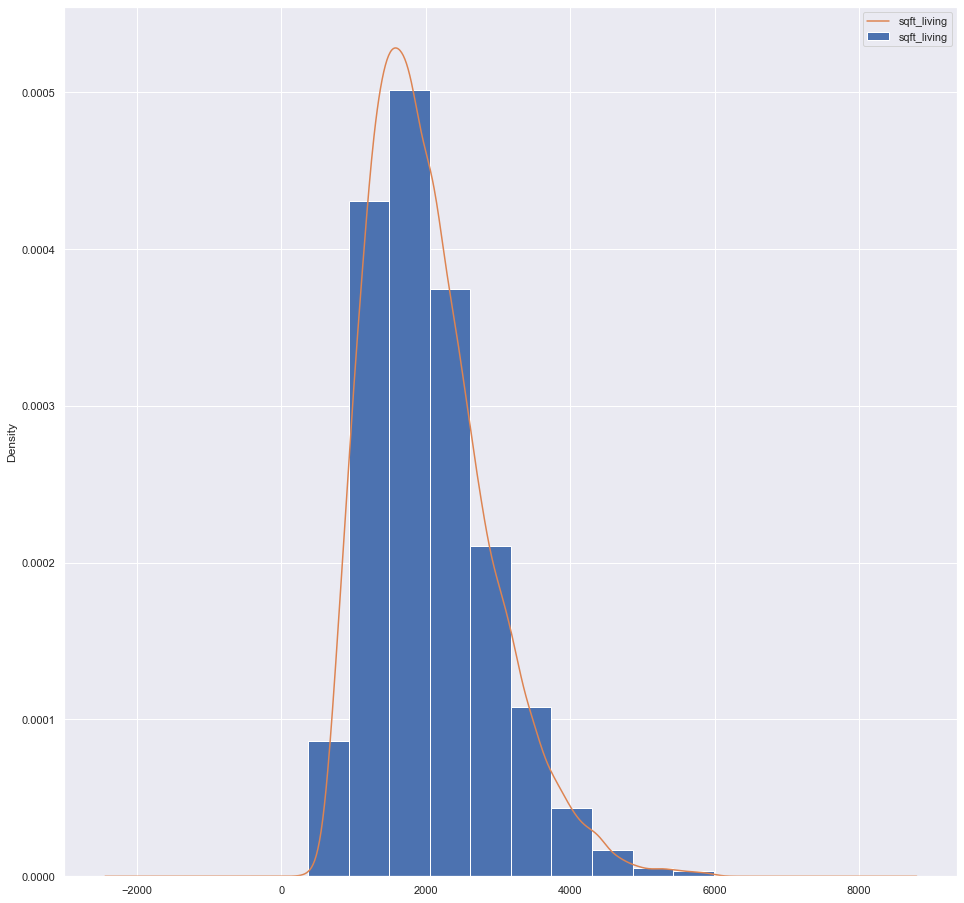

In [155]:
model_data_3.sqft_living.plot.hist(density=True)
model_data_3.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

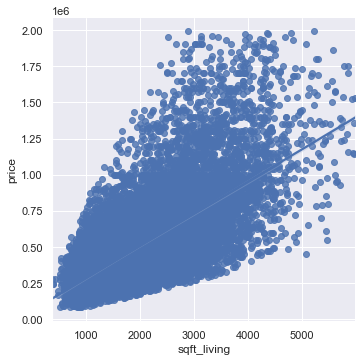

In [156]:
sns.lmplot(x='sqft_living', y='price', data=X_y_train);

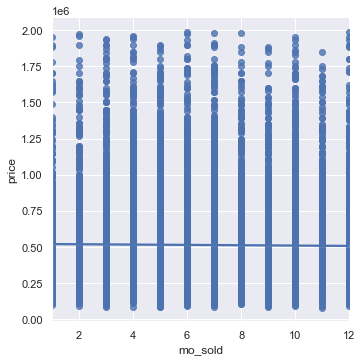

In [157]:
sns.lmplot(x='mo_sold', y='price', data=X_y_train);

'sqft_liivng' and price do meet linearity assumption. \
'mo_sold'(month sold) looks like categorical variable and can be broken to dummies.   

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

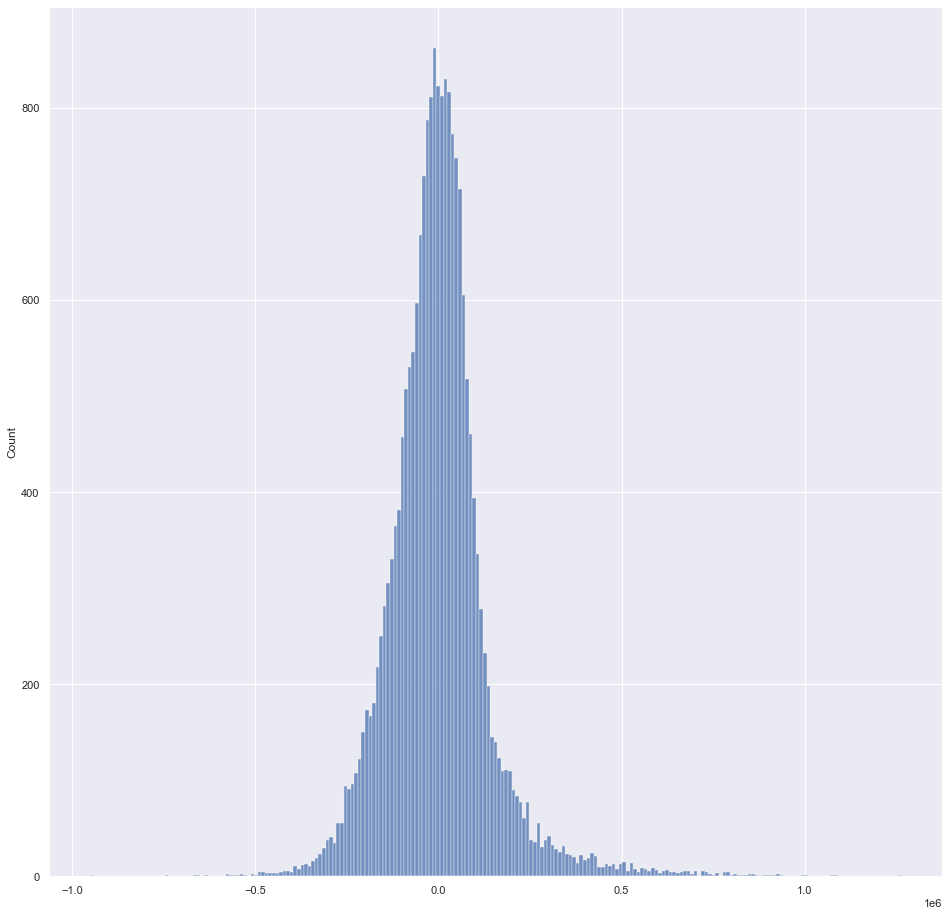

In [158]:
sns.histplot(model_3.resid)

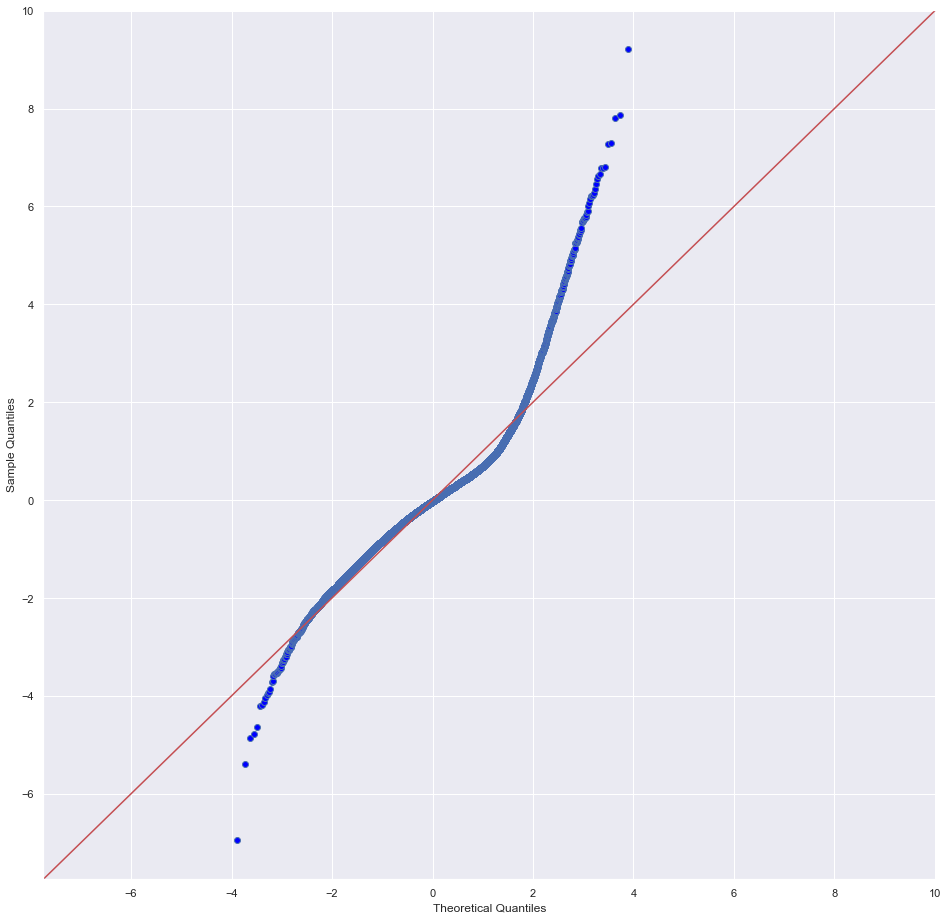

In [159]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residuals are not normally distributed. It looks like the residuals histogram is too peaked in the middle.  

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (1.976). 

### Model_3_log (with log transformation)

In [160]:
# We will rerun model_3 with log transformed 'sqft_living'

In [161]:
model_data_3_log = X_train_prep_log.loc[:, features_3]

In [162]:
predictors_3_log = sm.add_constant(model_data_3_log)
model_3_log = sm.OLS(y_train_log, predictors_3_log).fit()
model_3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2453.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:37   Log-Likelihood:                 744.95
No. Observations:               20685   AIC:                            -1430.
Df Residuals:                   20655   BIC:                            -1192.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2880      0.049    188.345      0.000       9.191       9.385
grade_11 Excellent      0.1366      0.016      8.757      0.000       0.106       0.167
waterfront_YES          0.5703      0.027     21.462      0.000       0.518       0.622
condition_Very Good     0.1543      0.006     24.537      0.000       0.142       0.167
grade_9 Better         -0.1184      0.009    -13.492      0.000      -0.136      -0.101
grade_7 Average        -0.4472      0.009    -48.922      0.000      -0.465      -0.429
grade_6 Low Average    -0.5863      0.011    -51.410      0.000      -0.609      -0.564
grade_8 Good           -0.3002      0.009    -35.277      0.000      -0.317      -0.283
grade_5 Fair           -0.6141      0.020    -31.407      0.000      -0.652      -0.576
condition_Good          0.0646      0.004     16.520      0.000       0.057       0.072
mo_sold                -0.0044      0.001     -8.423      0.000      -0.005      -0.003
sqft_living             0.4800      0.006     80.581      0.000       0.468       0.492
city_Bellevue           0.6470      0.009     69.130      0.000       0.629       0.665
city_Bothell            0.4310      0.012     35.460      0.000       0.407       0.455
city_Duvall             0.3537      0.018     19.547      0.000       0.318       0.389
city_Enumclaw           0.1013      0.017      5.962      0.000       0.068       0.135
city_Issaquah           0.5398      0.009     57.913      0.000       0.521       0.558
city_Kent               0.0542      0.009      6.122      0.000       0.037       0.072
city_Kirkland           0.6384      0.009     67.218      0.000       0.620       0.657
city_Maple Valley       0.1790      0.011     15.863      0.000       0.157       0.201
city_Mercer Island      0.8707      0.016     54.430      0.000       0.839       0.902
city_North Bend         0.3658      0.017     21.457      0.000       0.332       0.399
city_Redmond            0.5855      0.009     68.149      0.000       0.569       0.602
city_Renton             0.2470      0.008     30.073      0.000       0.231       0.263
city_Seattle            0.6600      0.006    102.798      0.000       0.647       0.673
city_Shoreline          0.4804      0.009     53.953      0.000       0.463       0.498
city_Snoqualmie         0.4319      0.015     29.367      0.000       0.403       0.461
city_Tukwila            0.1873      0.010     18.801      0.000       0.168       0.207
city_Woodinville        0.4866      0.012     39.388      0.000       0.462       0.511
city_Yarrow Point       1.0959      0.015     71.727      0.000       1.066       1.126
==============================================================================
Omnibus:                     1296.349   Durbin-Watson:                   1.983
Prob(Omnibus):       

##### Checking on Multicollinearity with VIF

In [163]:
# the independent variables set
X = predictors_3_log
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,921.969676
5,grade_7 Average,7.736368
7,grade_8 Good,5.618011
6,grade_6 Low Average,4.197056
24,city_Seattle,3.445875
4,grade_9 Better,3.107848
11,sqft_living,2.222534
23,city_Renton,1.799714
22,city_Redmond,1.769101
17,city_Kent,1.614423


##### Checking on normality of feature data

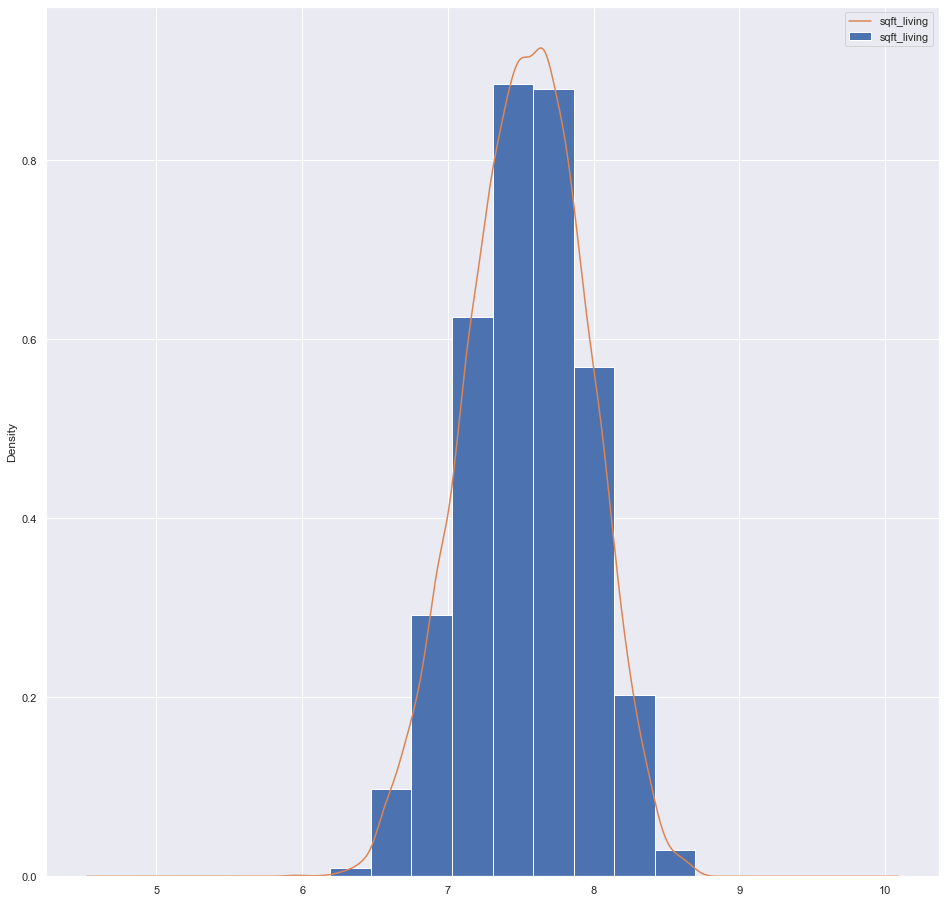

In [164]:
model_data_3_log.sqft_living.plot.hist(density=True)
model_data_3_log.sqft_living.plot.kde()
plt.legend()
plt.show();

##### Checking on linearity assumption

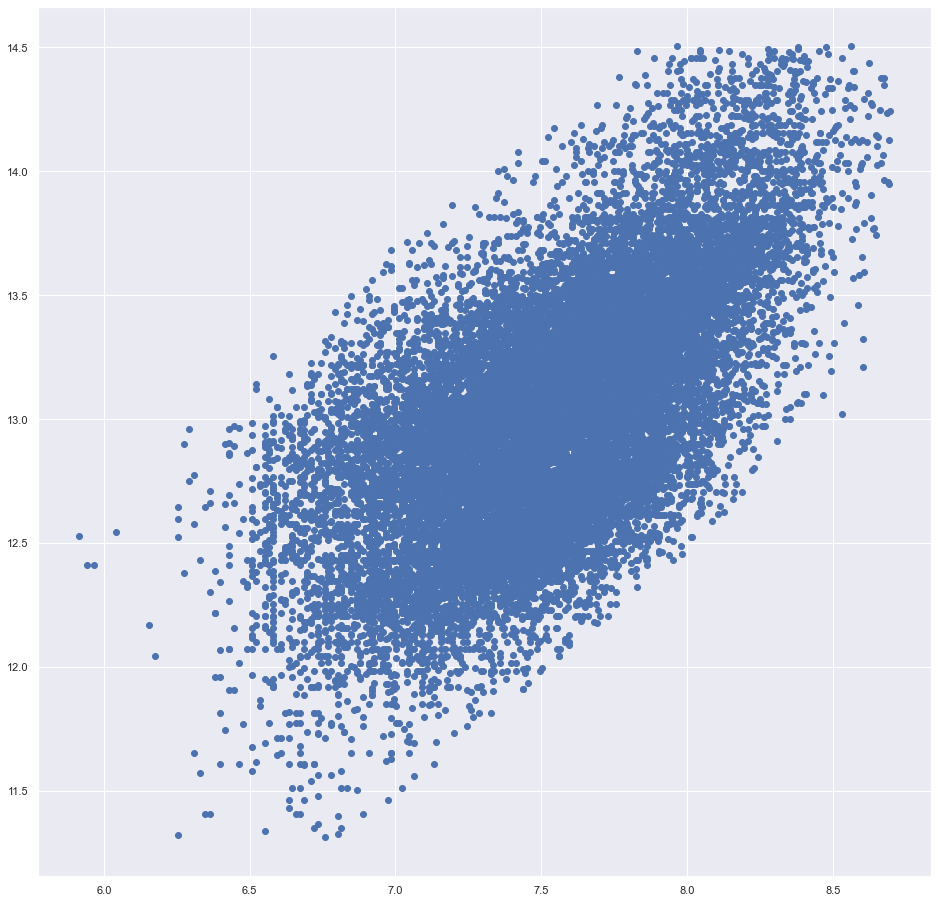

In [165]:
plt.scatter(x = X_train_prep_log.sqft_living, y = y_train_log)
plt.show()

##### Checking on Normality of residuals

<AxesSubplot:ylabel='Count'>

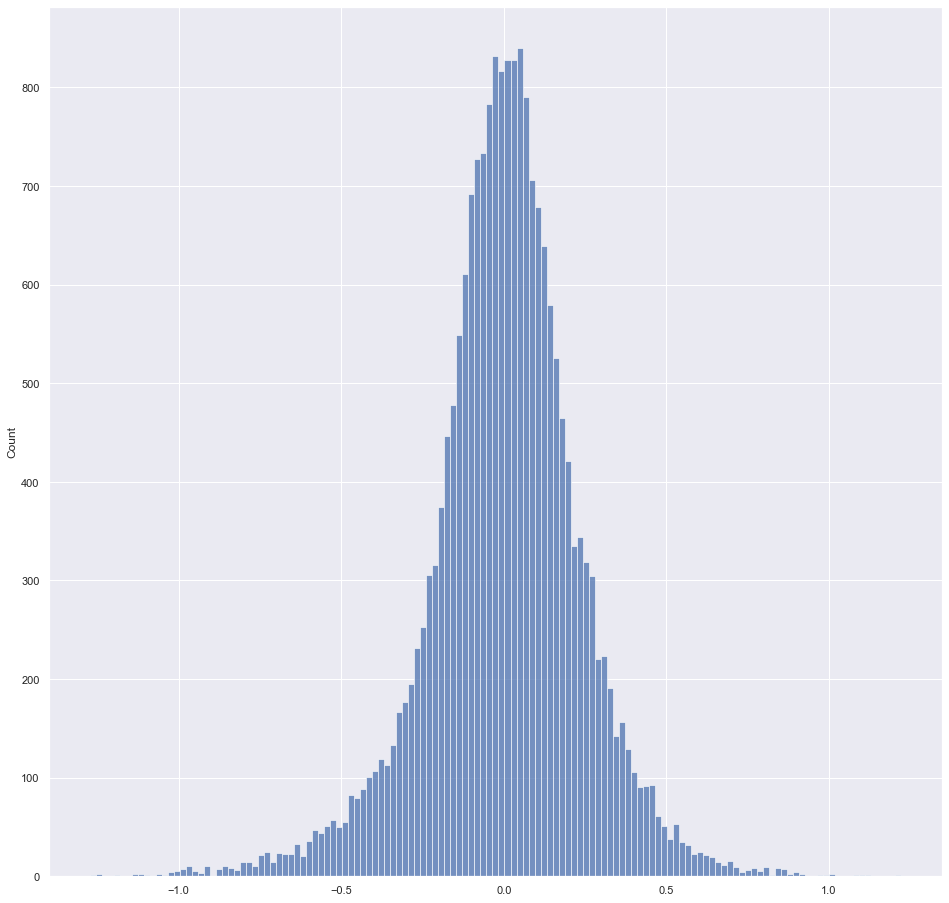

In [166]:
sns.histplot(model_3_log.resid)

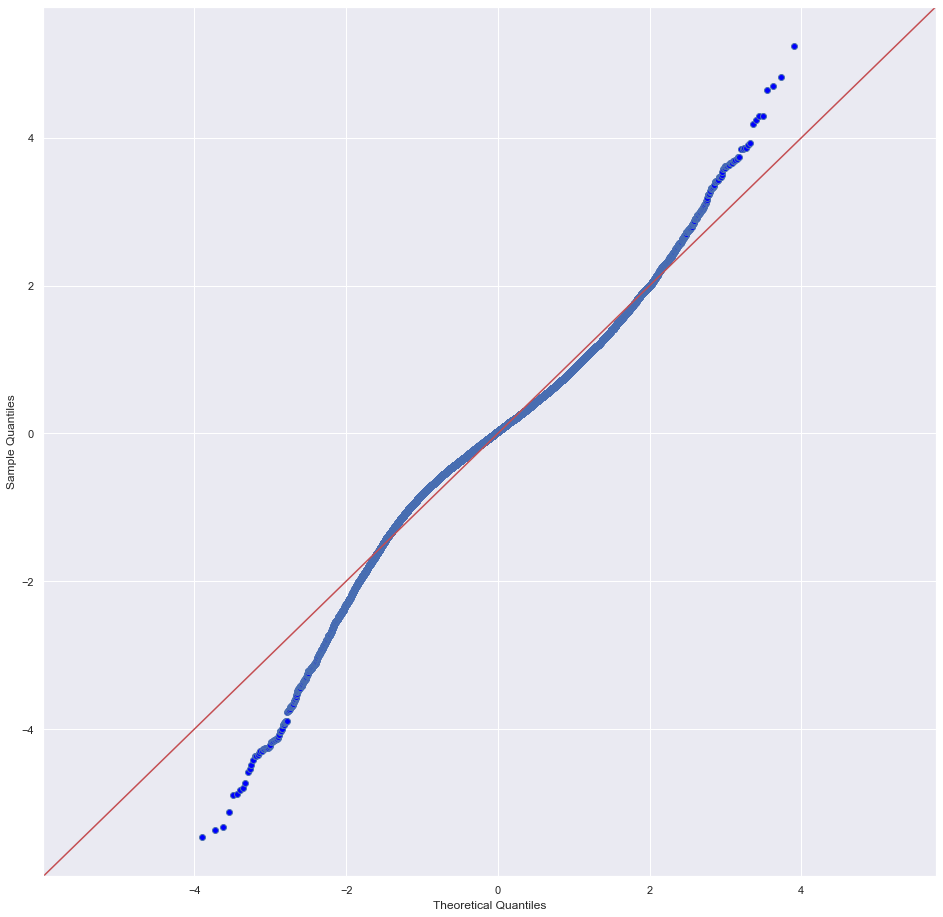

In [167]:
#checking in normality assumption for residuals

residuals = model_3_log.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (1.983). 

### Model_4

In [168]:
# Model_3 with 'yr_sold' and 'mo_sold' as categoricals

In [169]:
X_train_preprocessed_2.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'yr_sold_2015', 'mo_sold_2', 'mo_sold_3',
       'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
     

In [170]:
features_4 = ['sqft_living',  'waterfront_YES', 'yr_sold_2015',
              'condition_Fair', 'condition_Good', 'condition_Very Good', 
              'grade_9 Better', 'grade_11 Excellent',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair',  
              'mo_sold_3', 'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
              'mo_sold_9', 'mo_sold_10', 'mo_sold_11', 'mo_sold_12',
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [171]:
model_data_4 = X_train_preprocessed_2.loc[:, features_4]

In [172]:
predictors_4 = sm.add_constant(model_data_4)
model_4 = sm.OLS(y_train, predictors_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1601.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:22:40   Log-Likelihood:            -2.7395e+05
No. Observations:               20685   AIC:                         5.480e+05
Df Residuals:                   20644   BIC:                         5.483e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.291e+05   1.07e+04     21.375      0.000    2.08e+05     2.5e+05
sqft_living           132.2607      1.761     75.094      0.000     128.809     135.713
waterfront_YES       5.109e+05   1.56e+04     32.834      0.000     4.8e+05    5.41e+05
yr_sold_2015         4.217e+04   6457.636      6.531      0.000    2.95e+04    5.48e+04
condition_Fair      -2.976e+04   1.11e+04     -2.679      0.007   -5.15e+04   -7989.418
condition_Good       3.597e+04   2298.793     15.648      0.000    3.15e+04    4.05e+04
condition_Very Good  9.335e+04   3689.908     25.299      0.000    8.61e+04    1.01e+05
grade_9 Better       -1.15e+05   5202.430    -22.112      0.000   -1.25e+05   -1.05e+05
grade_11 Excellent    1.36e+05   9185.397     14.804      0.000    1.18e+05    1.54e+05
grade_7 Average     -2.997e+05   5623.577    -53.288      0.000   -3.11e+05   -2.89e+05
grade_6 Low Average -3.459e+05   6787.858    -50.953      0.000   -3.59e+05   -3.33e+05
grade_8 Good         -2.34e+05   5199.859    -44.994      0.000   -2.44e+05   -2.24e+05
grade_5 Fair        -3.222e+05   1.14e+04    -28.239      0.000   -3.45e+05      -3e+05
mo_sold_3            2.243e+04   4380.212      5.121      0.000    1.38e+04     3.1e+04
mo_sold_4              2.8e+04   4190.387      6.681      0.000    1.98e+04    3.62e+04
mo_sold_5            3.198e+04   6272.417      5.098      0.000    1.97e+04    4.43e+04
mo_sold_6            3.997e+04   7705.643      5.187      0.000    2.49e+04    5.51e+04
mo_sold_7            3.837e+04   7697.645      4.984      0.000    2.33e+04    5.35e+04
mo_sold_8            3.072e+04   7785.238      3.947      0.000    1.55e+04     4.6e+04
mo_sold_9            3.114e+04   7836.209      3.974      0.000    1.58e+04    4.65e+04
mo_sold_10           4.106e+04   7802.181      5.263      0.000    2.58e+04    5.64e+04
mo_sold_11           3.466e+04   8029.638      4.316      0.000    1.89e+04    5.04e+04
mo_sold_12           3.408e+04   7983.488      4.269      0.000    1.84e+04    4.97e+04
city_Bellevue        2.756e+05   5483.858     50.250      0.000    2.65e+05    2.86e+05
city_Bothell         1.457e+05   7119.119     20.463      0.000    1.32e+05     1.6e+05
city_Duvall          1.151e+05   1.06e+04     10.854      0.000    9.43e+04    1.36e+05
city_Enumclaw        3.725e+04   9949.533      3.744      0.000    1.77e+04    5.68e+04
city_Issaquah        1.945e+05   5461.880     35.616      0.000    1.84e+05    2.05e+05
city_Kent            1.575e+04   5182.555      3.039      0.002    5594.117    2.59e+04
city_Kirkland        2.743e+05   5562.293     49.312      0.000    2.63e+05    2.85e+05
city_Maple Valley    4.804e+04   6611.319      7.266      0.000    3.51e+04     6.1e+04
city_Mercer Island   4.881e+05   9373.803     52.074      0.000     4.7e+05    5.07e+05
cit

##### Checking on multicollinearity with VIF

In [173]:
# the independent variables set
X = predictors_4
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,127.061833
3,yr_sold_2015,10.086477
9,grade_7 Average,8.540625
11,grade_8 Good,6.119613
17,mo_sold_7,6.040176
16,mo_sold_6,5.969332
18,mo_sold_8,5.453237
20,mo_sold_10,5.345645
19,mo_sold_9,5.136053
22,mo_sold_12,4.468259


##### Checking on normality of feature data

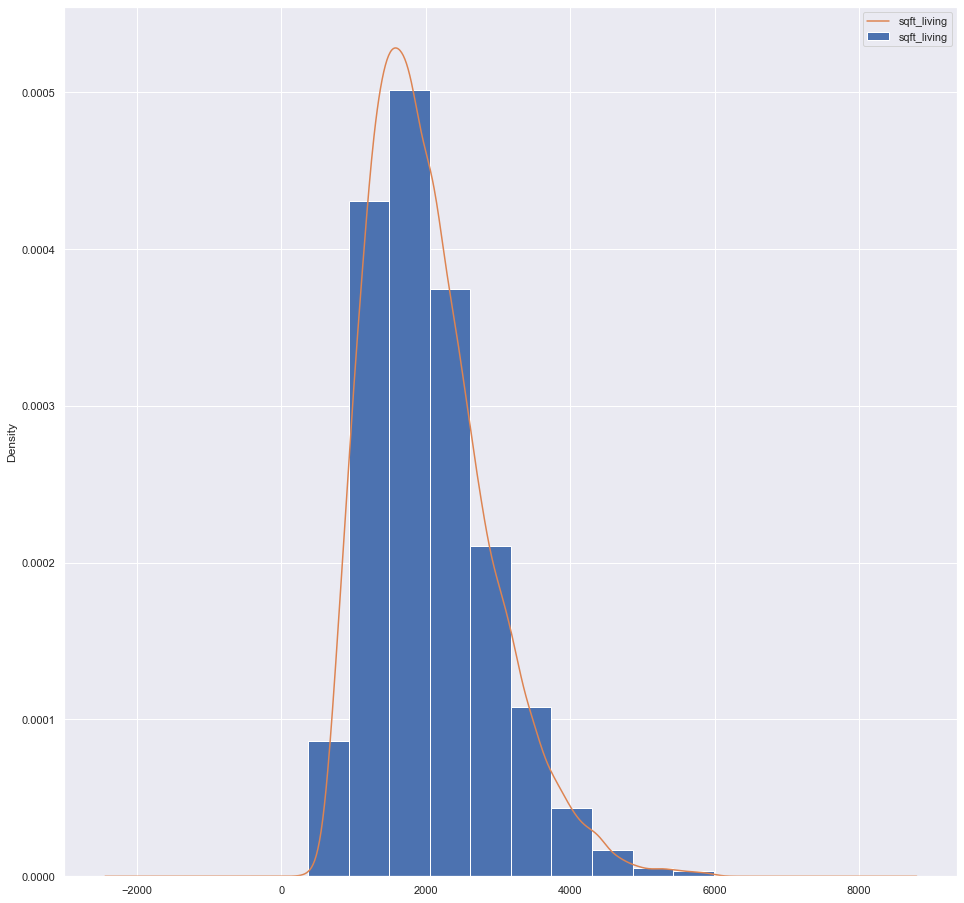

In [174]:
model_data_4.sqft_living.plot.hist(density=True)
model_data_4.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

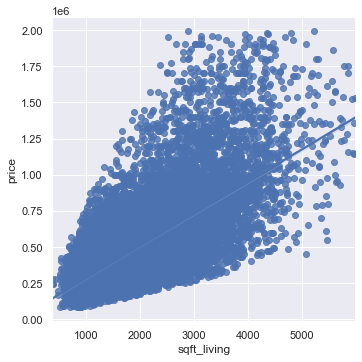

In [175]:
sns.lmplot(x='sqft_living', y='price', data=X_y_train);

'sqft_liivng' and price do meet linearity assumption. 

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

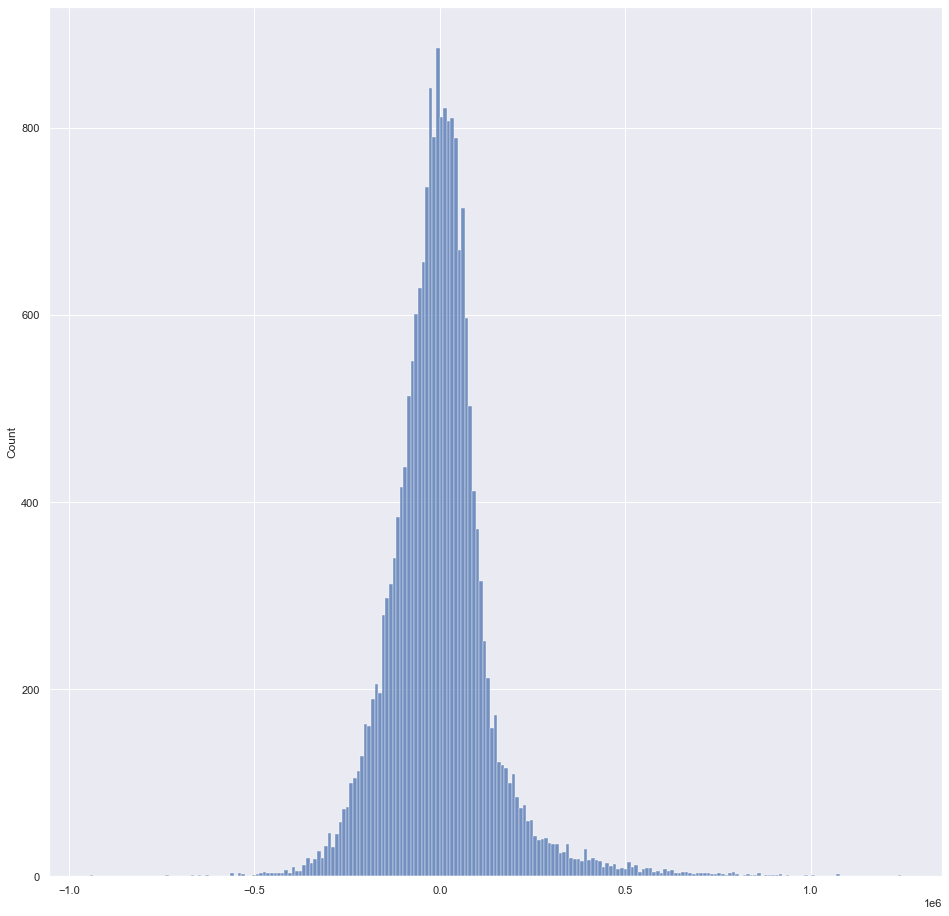

In [176]:
sns.histplot(model_4.resid)

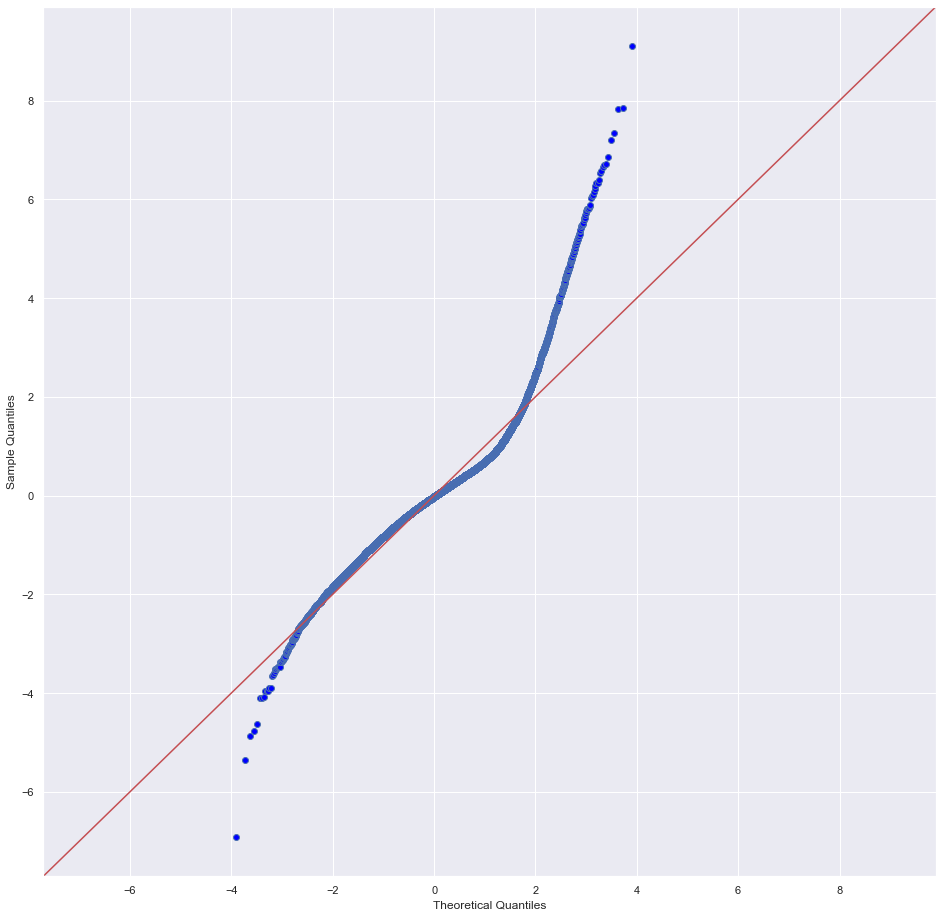

In [177]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
plt.savefig('Model_4 residuals.png', bbox_inches='tight');

Residuals are not normally distributed. It looks like the residuals histogram has a high skinny top. 

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (1.979). 

### Model_4_log (with log transformation)

In [178]:
# Model_4 with 'yr_sold' and 'mo_sold' as categoricals and 'price' log transformed

In [179]:
features_4 = ['sqft_living',  'waterfront_YES', 'yr_sold_2015',
              'condition_Fair', 'condition_Good', 'condition_Very Good', 
              'grade_9 Better', 'grade_11 Excellent',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair',  
              'mo_sold_3', 'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
              'mo_sold_9', 'mo_sold_10', 'mo_sold_11', 'mo_sold_12',
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [180]:
model_data_4_log = X_train_preprocessed_2.loc[:, features_4]

In [188]:
predictors_4_log = sm.add_constant(model_data_4_log)
model_4_log = sm.OLS(y_train_log, predictors_4_log).fit()
model_4_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1780.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:30:38   Log-Likelihood:                 760.09
No. Observations:               20685   AIC:                            -1438.
Df Residuals:                   20644   BIC:                            -1113.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2456      0.018    669.216      0.000      12.210      12.282
sqft_living             0.0002   3.01e-06     79.051      0.000       0.000       0.000
waterfront_YES          0.5763      0.027     21.695      0.000       0.524       0.628
yr_sold_2015            0.0934      0.011      8.473      0.000       0.072       0.115
condition_Fair         -0.1381      0.019     -7.283      0.000      -0.175      -0.101
condition_Good          0.0668      0.004     17.024      0.000       0.059       0.074
condition_Very Good     0.1604      0.006     25.470      0.000       0.148       0.173
grade_9 Better         -0.0700      0.009     -7.883      0.000      -0.087      -0.053
grade_11 Excellent      0.0663      0.016      4.230      0.000       0.036       0.097
grade_7 Average        -0.3821      0.010    -39.802      0.000      -0.401      -0.363
grade_6 Low Average    -0.5699      0.012    -49.183      0.000      -0.593      -0.547
grade_8 Good           -0.2267      0.009    -25.540      0.000      -0.244      -0.209
grade_5 Fair           -0.6438      0.019    -33.058      0.000      -0.682      -0.606
mo_sold_3               0.0416      0.007      5.563      0.000       0.027       0.056
mo_sold_4               0.0613      0.007      8.564      0.000       0.047       0.075
mo_sold_5               0.0769      0.011      7.182      0.000       0.056       0.098
mo_sold_6               0.0946      0.013      7.188      0.000       0.069       0.120
mo_sold_7               0.0848      0.013      6.451      0.000       0.059       0.111
mo_sold_8               0.0798      0.013      6.007      0.000       0.054       0.106
mo_sold_9               0.0830      0.013      6.206      0.000       0.057       0.109
mo_sold_10              0.0903      0.013      6.779      0.000       0.064       0.116
mo_sold_11              0.0818      0.014      5.969      0.000       0.055       0.109
mo_sold_12              0.0791      0.014      5.802      0.000       0.052       0.106
city_Bellevue           0.6406      0.009     68.429      0.000       0.622       0.659
city_Bothell            0.4285      0.012     35.262      0.000       0.405       0.452
city_Duvall             0.3519      0.018     19.445      0.000       0.316       0.387
city_Enumclaw           0.0969      0.017      5.704      0.000       0.064       0.130
city_Issaquah           0.5371      0.009     57.606      0.000       0.519       0.555
city_Kent               0.0514      0.009      5.805      0.000       0.034       0.069
city_Kirkland           0.6353      0.009     66.908      0.000       0.617       0.654
city_Maple Valley       0.1780      0.011     15.771      0.000       0.156       0.200
city_Mercer Island      0.8575      0.016     53.585      0.000       0.826       0.889
cit

##### Checking on multicollinearity with VIF

In [182]:
# the independent variables set
X = predictors_4_log
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,const,127.061833
3,yr_sold_2015,10.086477
9,grade_7 Average,8.540625
11,grade_8 Good,6.119613
17,mo_sold_7,6.040176
16,mo_sold_6,5.969332
18,mo_sold_8,5.453237
20,mo_sold_10,5.345645
19,mo_sold_9,5.136053
22,mo_sold_12,4.468259


##### Checking on normality of feature data

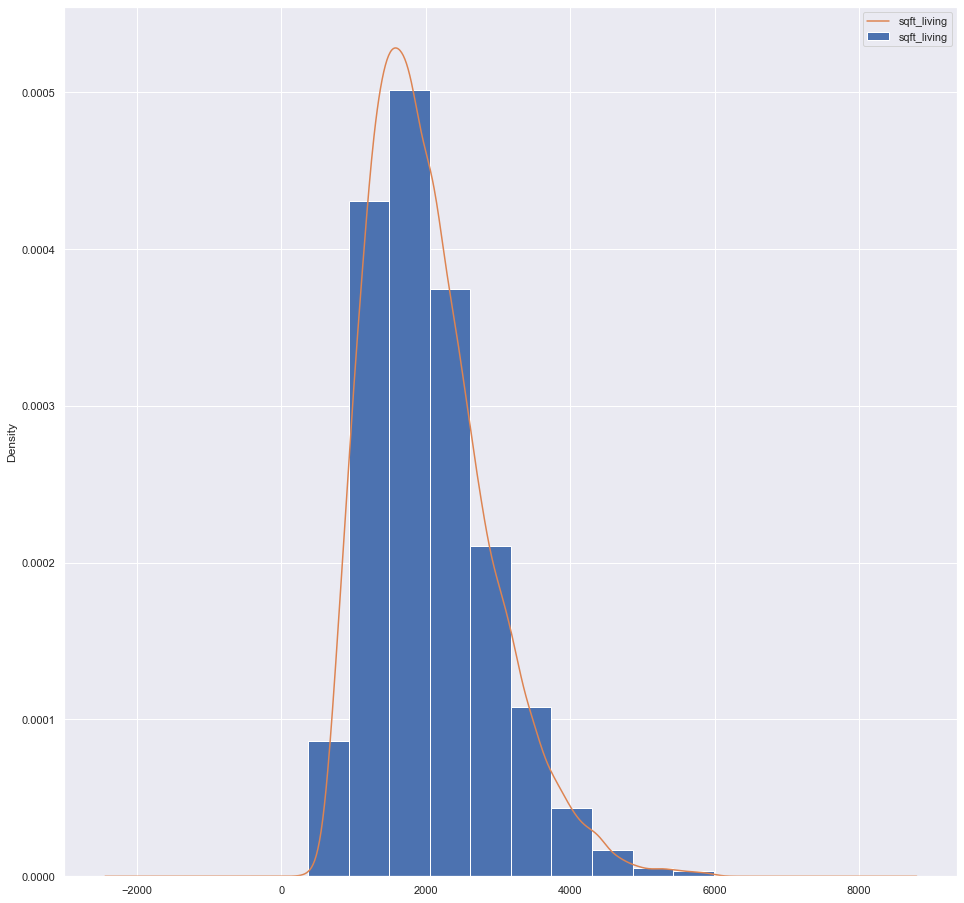

In [183]:
model_data_4_log.sqft_living.plot.hist(density=True)
model_data_4_log.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

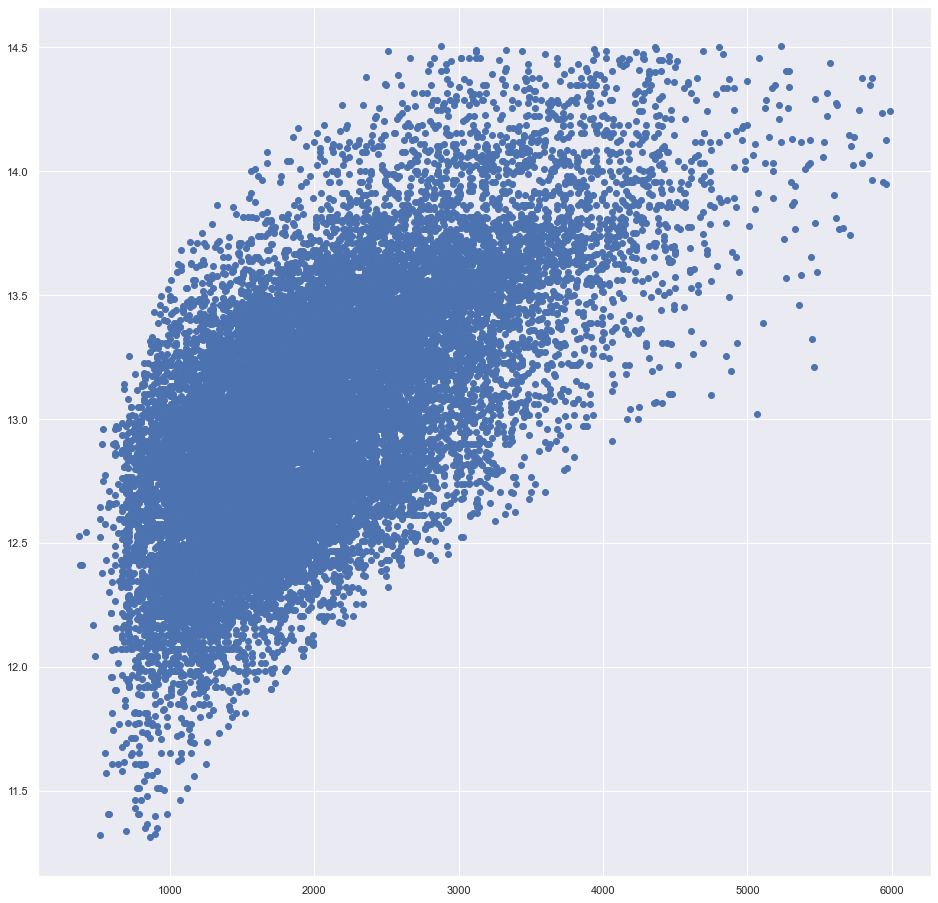

In [184]:
plt.scatter(x = X_train_preprocessed_2.sqft_living, y = y_train_log)
plt.show()

'sqft_liivng' and price do meet linearity assumption. 

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

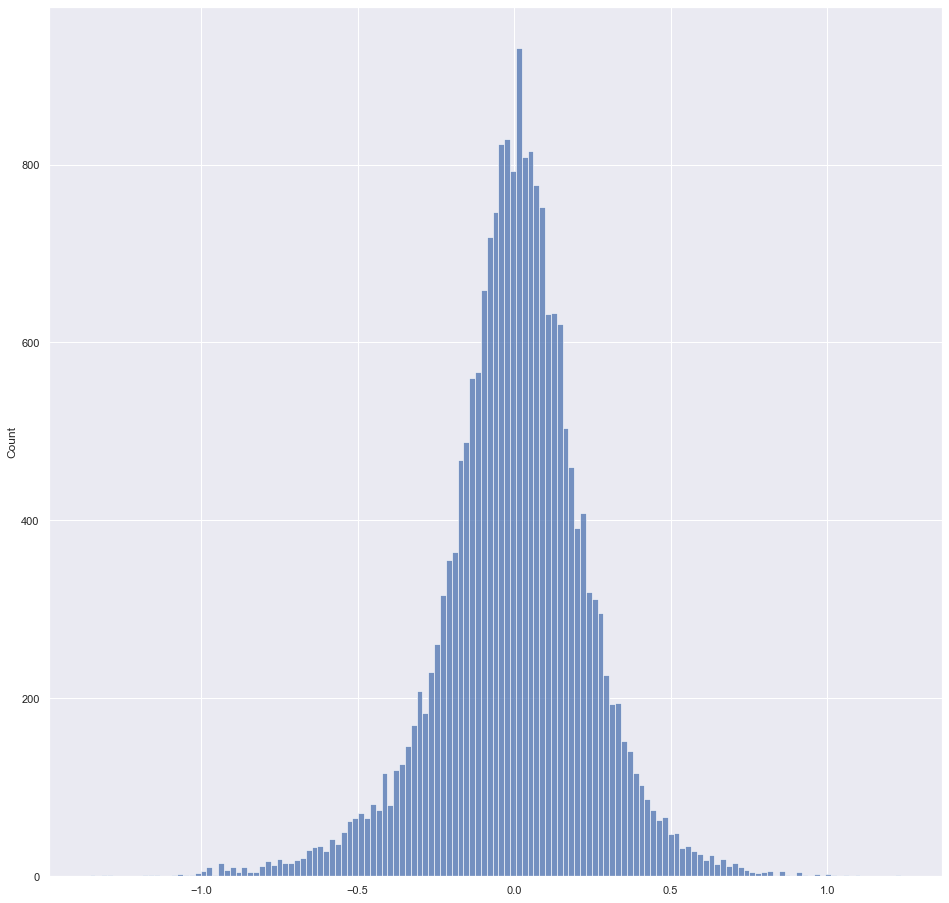

In [185]:
sns.histplot(model_4_log.resid)

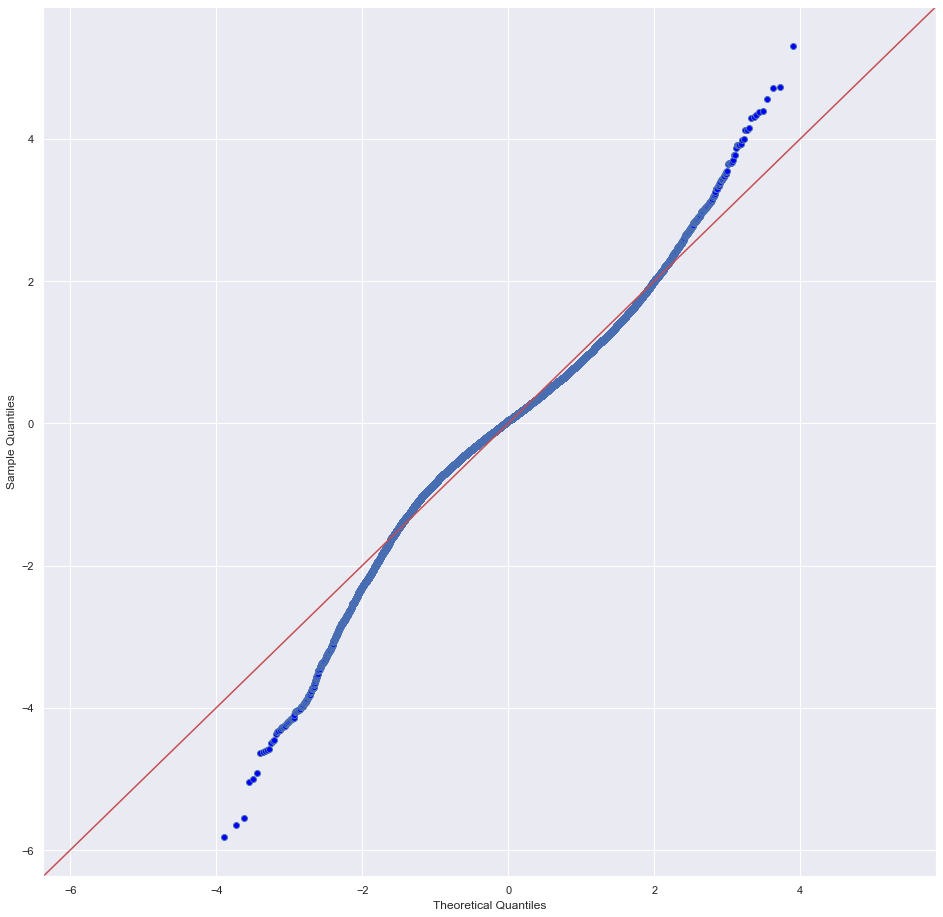

In [186]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_4_log.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
plt.savefig('Model_4_log residuals.png', bbox_inches='tight');

Residuals are relatively normally distributed except for tails. But the tails are still run in parallel 
even so not on the line. 

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (1.986). 

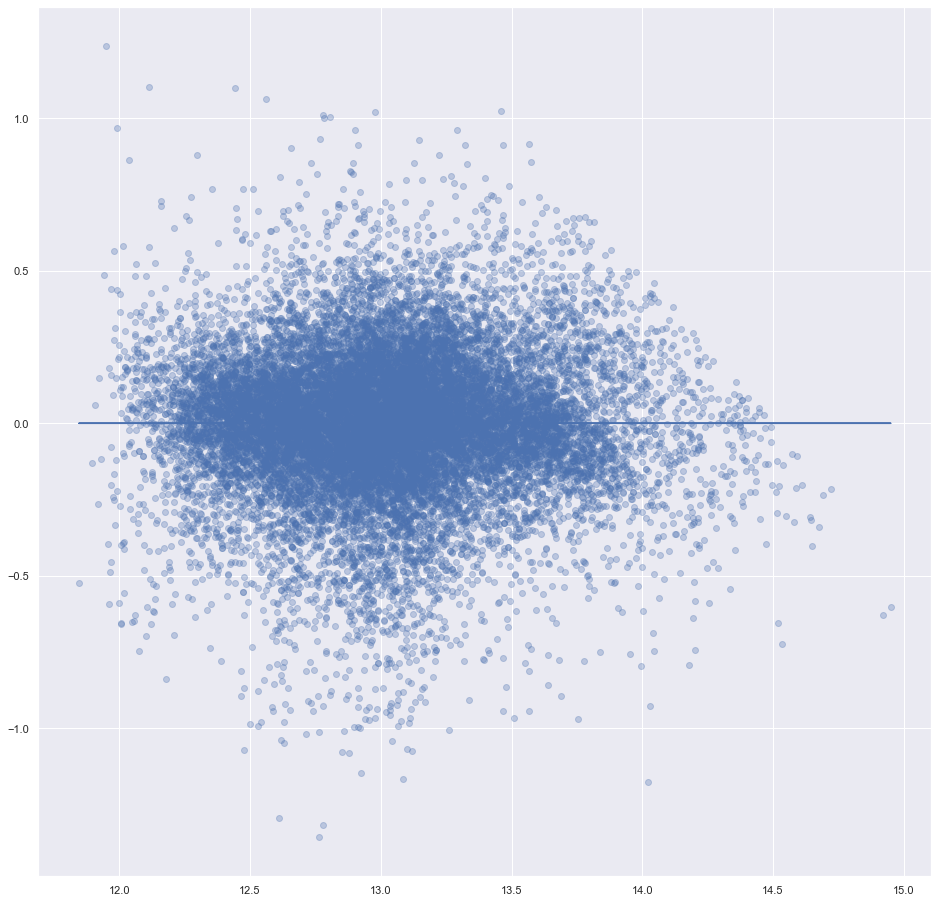

In [187]:
plt.scatter(x=model_4_log.fittedvalues,y=model_4_log.resid, alpha = 0.3)
plt.plot(model_4_log.predict(predictors_4_log), [0 for i in range(len(predictors_4_log))])

## 5. Model & Coefficient Interpretation

Our final model is Model_4_log. This model has 40 features and explain 77.5% (adj R2) of the target 'price'. We have one continious feature - 'sqft_living' and six categorical features broken into dummy variables. The model doesn't fully meet the Multiple Linear Regression assumptions, but it is pretty close to it. 

Assumptions: 
- Multicollinearity is mostly met, except 'yr_sold 2015' that is slightly above 10 on VIF score. 
- Linearity assumption is met as there is a positive correlation between 'sqft_living' and 'price'
- Normality of residuals is mostly fine with the excemption of the tails. Those can be improved by further subsetting data. 
- Homoscedasticity is met. 

##### Interpretation of Coefficients: 
----
- for every 2/100 percent increase in square feet there is one percent increase in price.  
- the price for a house with the waterfront view is 57.6% higher than for a house without one.
- a sale price in 2015 was 9.3% higher compare to the previous year.
- a price change of -13.8%, +6.7%, and +16% based on the condition of a house (Fair, Good, Very Good respectively) in comparison to Average condition house. 
- a price change based on the grade of a house in comparison to Very Good grade house is: \
    +6.6%  Excellent \
    -7%    Better \
    -22.7% Good \
    -38%   Average \
    -56.7% Low Average \
    -64.4% Fair 
             
- a price change based on a month sold in comparison to January is: \
    +4.2% March \
    +6.1% April \
    +7.8% May \
    +9.5% June \ 
    +8.5% July \ 
    +8%   August \ 
    +8.3% September \
    +9%   October \
    +8.2% November \
    +7.9% December
    
- a price change based on a city in comparison to Auburn is:\
    +64.1% Bellevue \
    +42.3% Bothell \
    +35.2% Duvall \
    +9.7%  Enumclaw \
    +53.7% Issaquah \
    +5.1%  Kent \
    +63.5% Kirkland \
    +17.8% Maple Valley \
    +85.8% Mercer Island \
    +36.5% North Bend \
    +58.2% Redmond \
    +24.5% Renton \
    +64.7% Seattle \
    +46.8% Shoreline \
    +42.2% Snoqualmie \
    +18.2% Tukwila \
    +48.2% Woodinville \
    +108.6 Yarrow Point
---    

## 6. Conclusion

***
Business Recommendations for customers (sellers): 

* condition: 
Perform maintenance and upgrades to increase price by up to 16% (from Average to Very Good).   

* grade: 
Renovate a house to increase the price by up to 71% (ex.renovating a house from Fair to Very Good grade will increase the value by 64%). However, additional calculaltions on ROI has to be done prior to this suggestion.  
* month: 
Sell a house in summer to early fall months for up to 9.5% higher in price. Best months to sell are June and October.  
 
* city: 
Houses in cities south of Seattle sell for at least 20% lower compare to houses West and North. 

Next Steps:  
* To acquire additional feature information (such as staged or not staged, fixture updates, curb appeal, color of interior and exterior walls, etc) regarding houses sold. Adding these features to our model can further expand agent's knowledge on what suggestions to make to clients that could increase the house value. 
* To get more recent house data through APIs (redfin API) to understand Housing Market trends in the past 20 years.   


